# EDA Case Study JUHI KUMARI

### 1. Import Required Libraries ###

In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To increase the row and columns count in display 

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

### 2. Upload the data

In [4]:
#application_data.csv contains all the information of the client at the time of application.
#The data is about whether a client has payment difficulties.

app_data = pd.read_csv("application_data.csv")
col_description = pd.read_csv("columns_description.csv",encoding='unicode_escape')

### 3. Information about the file and datastructure

In [5]:
#Shape(rows , columns) of the app_data

app_data.shape

(307511, 122)

In [6]:
#data view of app_data

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
#info of application_data.csv data

app_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [8]:
#descibe data of application_data.csv

app_data.describe(include = np.number)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

### 4. Data Cleaning

In [9]:
#Checking null values 
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
#number of columns with null values greater than or eqaul to 50%

null_more_than_50 = (app_data.isnull().sum()*100)/len(app_data)
len(null_more_than_50[null_more_than_50 >=50])

41

In [11]:
#list of the columns having null values greater than or equal to 50%

rem = list(null_more_than_50[null_more_than_50 >=50].index)


In [12]:
#number of columns with null values less than 50%


null_less_than_50 = (app_data.isnull().sum()*100)/len(app_data)
len(null_less_than_50[null_less_than_50 <50])

81

In [13]:
#Remove columns having more than 50% null values from the dataframe 

app_data = app_data.drop(columns= rem)

In [14]:
app_data.shape

(307511, 81)

In [15]:
app_data.isnull().sum()/len(app_data)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [16]:
#checking for less percentage around 13% check best metric to impute missing value

#NAME_TYPE_SUITE column has very few value which is missing. We can check what all values are there for this column.
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Suggestion:We can fill null values of NAME_TYPE_SUITE to 'Unaccompanied' as its most common value for the column.

In [17]:
#DAYS_LAST_PHONE_CHANGE column null value analysis
app_data['DAYS_LAST_PHONE_CHANGE'].describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [18]:
app_data['DAYS_LAST_PHONE_CHANGE'].mode()

0    0.0
dtype: float64

Suggestion:We can fill DAYS_LAST_PHONE_CHANGE to 0 since its the mode for that columns.

In [19]:
#OBS_30_CNT_SOCIAL_CIRCLE column null value analysis
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Suggestion:We can fill OBS_30_CNT_SOCIAL_CIRCLE to 0 since its the median for that columns.

In [20]:
#CNT_FAM_MEMBERS column null value analysis
app_data['CNT_FAM_MEMBERS'].mode()

0    2.0
dtype: float64

Suggestion:We can fill CNT_FAM_MEMBERS to 2 since its the mode for that column

In [21]:
#DEF_30_CNT_SOCIAL_CIRCLE column null value analysis
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

Suggestion:We can fill DEF_30_CNT_SOCIAL_CIRCLE to 0 since its the median for that columns.

In [22]:
#Data Types of the columns
#info of application_data.csv data
app_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [23]:
# The below days field is stored as negative value. This may be beacuse they are counting the dyas before loadging the application.
app_data[['DAYS_REGISTRATION','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]

,DAYS_REGISTRATION,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-3648.0,-9461,-637,-2120,-1134.0
1,-1186.0,-16765,-1188,-291,-828.0
2,-4260.0,-19046,-225,-2531,-815.0
3,-9833.0,-19005,-3039,-2437,-617.0
4,-4311.0,-19932,-3038,-3458,-1106.0
...,...,...,...,...,...
307506,-8456.0,-9327,-236,-1982,-273.0
307507,-4388.0,-20775,365243,-4090,0.0
307508,-6737.0,-14966,-7921,-5150,-1909.0
307509,-2562.0,-11961,-4786,-931,-322.0


In [24]:
app_data['DAYS_BIRTH'] = abs(app_data['DAYS_BIRTH'])
app_data['DAYS_ID_PUBLISH'] = abs(app_data['DAYS_ID_PUBLISH'])
app_data['DAYS_EMPLOYED'] = abs(app_data['DAYS_EMPLOYED'])
app_data['DAYS_LAST_PHONE_CHANGE'] = abs(app_data['DAYS_LAST_PHONE_CHANGE'])
app_data['DAYS_REGISTRATION'] = abs(app_data['DAYS_REGISTRATION'])

In [25]:
#DataType of DAYS_REGISTRATION is float converting to int since its storing days which cannot be float.
app_data['DAYS_REGISTRATION']=app_data['DAYS_REGISTRATION'].astype(int)

# Checking for Outliers

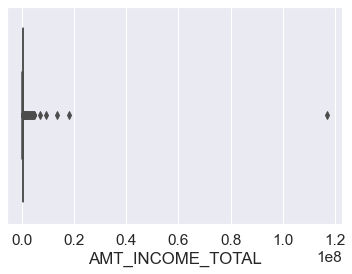

In [26]:
#Checking AMT_INCOME_TOTAL column which tells us the income of the client for outliers.
sns.set(font_scale=1.4)
sns.boxplot(app_data["AMT_INCOME_TOTAL"])

plt.show()

We can see many outliers in case of AMT_INCOME_TOTAL.There might be some clients who have high income.

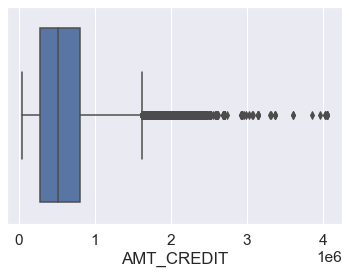

In [27]:
#Checking AMT_CREDIT column which tells us Credit amount of loan for outliers.
sns.boxplot(app_data["AMT_CREDIT"])
plt.show()

As seen in the boxplot above we can see lots of outliers for AMT_CREDIT.SOme clients might have taken loan for high amount.

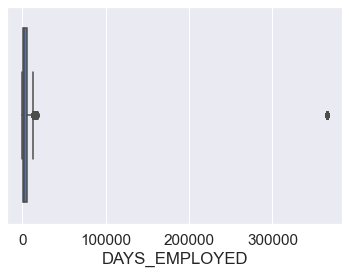

In [28]:
#Checking DAYS_EMPLOYED column which tells us how many days before loan application client started the current job for outliers.
sns.boxplot(app_data["DAYS_EMPLOYED"])
plt.show()

As we can see in the above plot there are outliers the value that is 300000+ are outliers.There can be clients who didn't switch companies and might be working in same company for long.

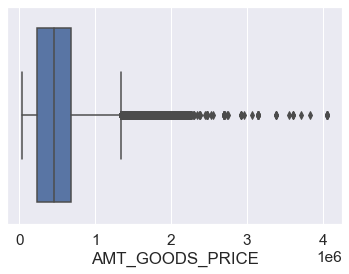

In [29]:
#Checking AMT_GOODS_PRICE column which tells us price of the goods for which the loan is given in case of consumer loan for outliers
sns.boxplot(app_data["AMT_GOODS_PRICE"])
plt.show()

There are many outliers for AMT_GOODS_PRICE field.

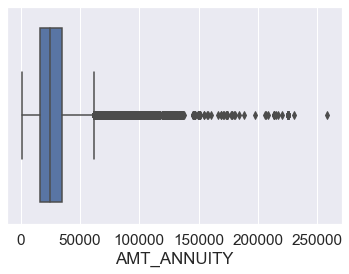

In [30]:
#Checking AMT_ANNUITY field which tells Loan Annuity for outliers
sns.boxplot(app_data["AMT_ANNUITY"])
plt.show()

As shown in the boxplot we can see there are lot of outliers

# Binning of Continous variable

AMT_INCOME_TOTAL and AMT_CREDIT are the colums which has impact on loan payment.

In [31]:
#AMT_INCOME_TOTAL analysis

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,
        225000,250000,275000,300000,325000,350000,375000,400000,
        425000,450000,475000,500000,10000000000]
slot = ['0-25000','25000-50000','50000-75000','75000,100000',
        '100000-125000','125000-150000','150000-175000','175000-200000',
        '200000-225000','225000-250000','250000-275000','275000-300000',
        '300000-325000','325000-350000','350000-375000','375000-400000',
        '400000-425000','425000-450000','450000-475000','475000-500000',
        '500000 and above']

app_data['AMT_INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [32]:
#AMT_CREDIT analysis

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,
        550000,600000,650000,700000,750000,800000,850000,900000,
        100000000]

slot = ['0-150000','150000-200000','200000-250000','250000-300000',
         '300000-350000','350000-400000','400000-450000','450000-500000',
         '500000-550000','550000-600000','600000-650000','650000-700000',
         '700000-750000','750000-800000','800000-850000','850000-900000',
         '900000 and above']

app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT'], bins=bins,labels= slot)

### Data Analysis

#Let's remove those columns which don't have anthing important to show 

In [33]:
app_data.drop(columns=app_data.iloc[:,40:81],axis=1,inplace=True)

In [34]:
app_data.drop(columns=app_data.iloc[:,21:27],axis=1,inplace=True)

In [35]:
app_data.drop(columns=app_data.iloc[:,23:27],axis=1,inplace=True)

In [36]:
app_data.shape

(307511, 32)

In [37]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,1.0,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,2.0,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,1.0,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833,2437,Laborers,2.0,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311,3458,Core staff,1.0,0,0,0,0,1,1,Religion,100000-125000,500000-550000


# Imbalance Check

In [38]:
#let's now create two subdatasets to get insights of customers who will face difficulties in repay and other than them
#Target variable (1 - client with payment difficulties and 0 - others)

target0_data = app_data.loc[app_data['TARGET']==0]
target1_data = app_data.loc[app_data['TARGET']==1]

In [39]:
#determine Imbalance

#target0 has the maximum values and target1 has lesser

round(len(target0_data)/len(target1_data),2)

11.39

In [40]:
app_data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

We can see the data is not a balanced. 91% data is of client who doesn't have difficulties in loan repayment. Ony 8% data is of deafulters.
The imbalance is 11.39.


# Univariate analysis

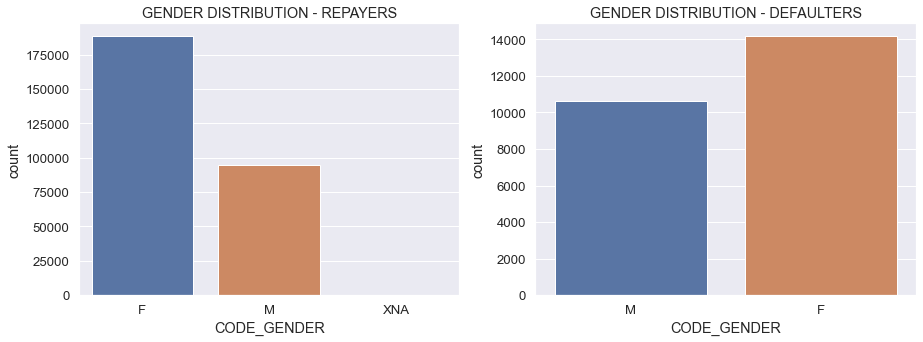

In [41]:
sns.set(font_scale=1.2)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(target0_data['CODE_GENDER'])
plt.title('GENDER DISTRIBUTION - REPAYERS')
plt.subplot(1,2,2)
sns.countplot(target1_data['CODE_GENDER'])
plt.title('GENDER DISTRIBUTION - DEFAULTERS')
plt.show()

Observation:We can see Defaulters are more in case of Male.

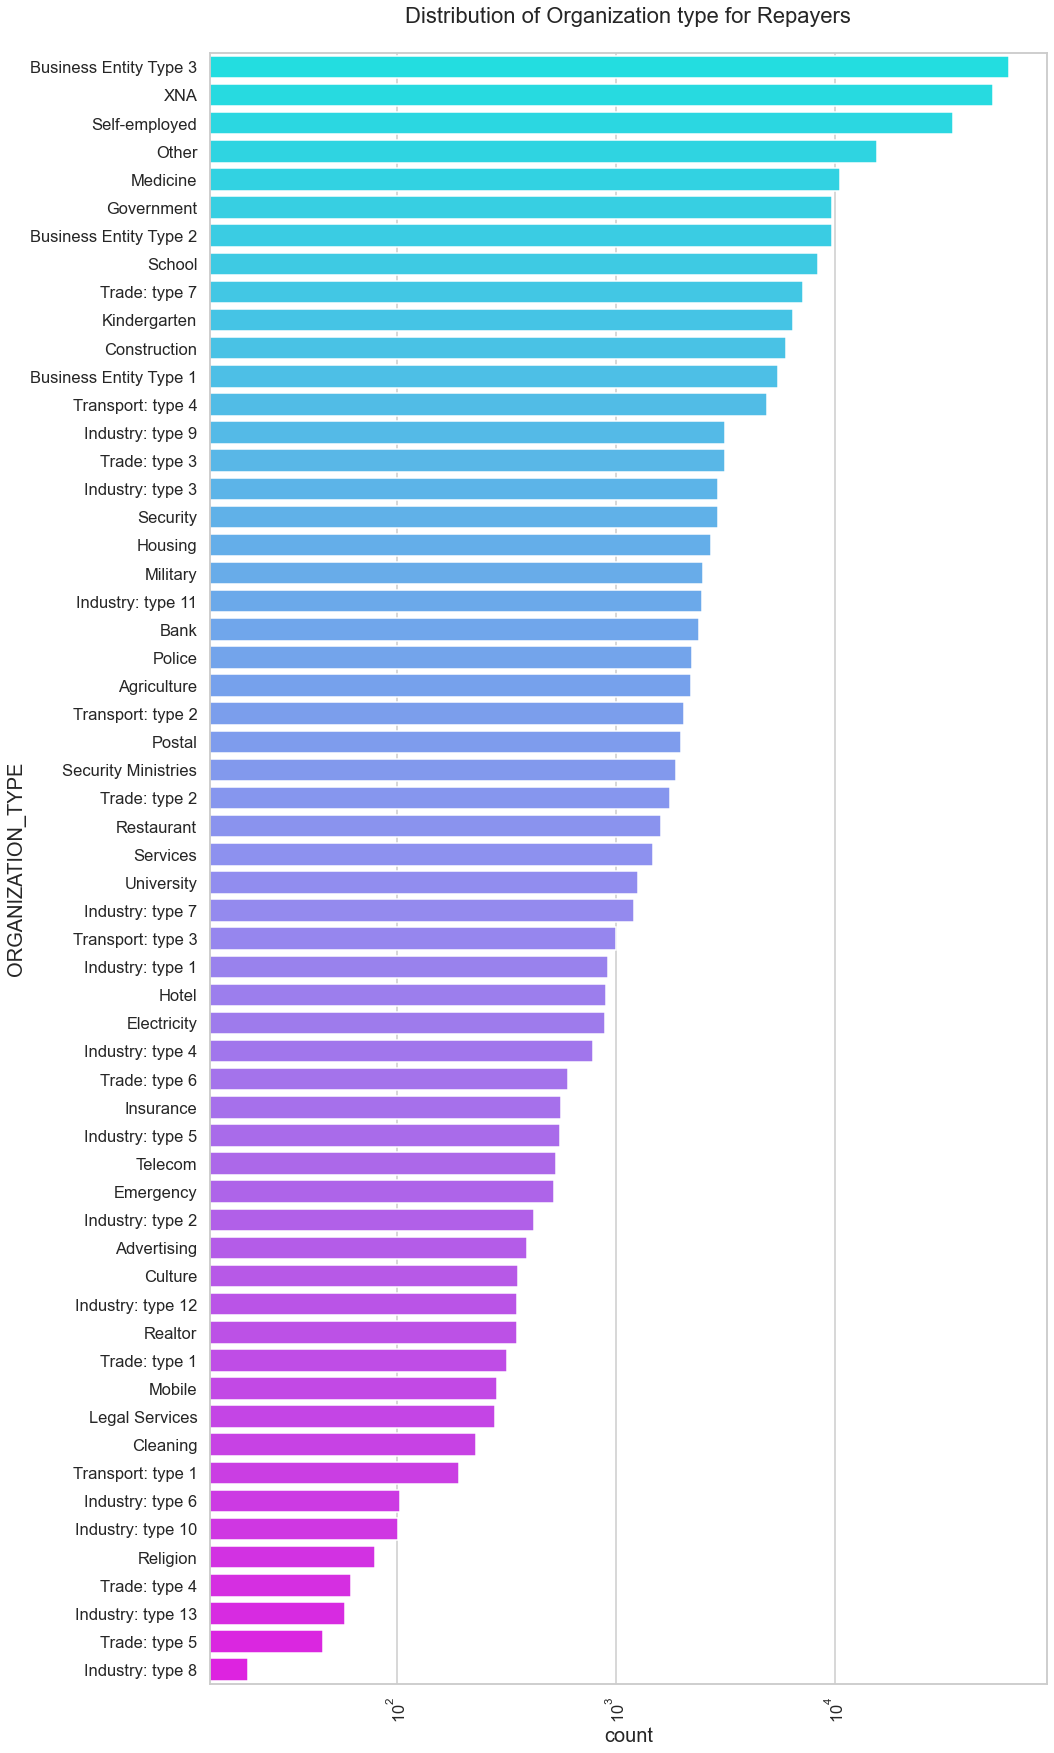

In [42]:
#count plot for Organization type in log scale
sns.set(font_scale=1.2)
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['axes.labelsize'] = 20

plt.title('Distribution of Organization type for Repayers')

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_data, y='ORGANIZATION_TYPE', order=target0_data['ORGANIZATION_TYPE'].value_counts().index , palette='cool')

plt.show()

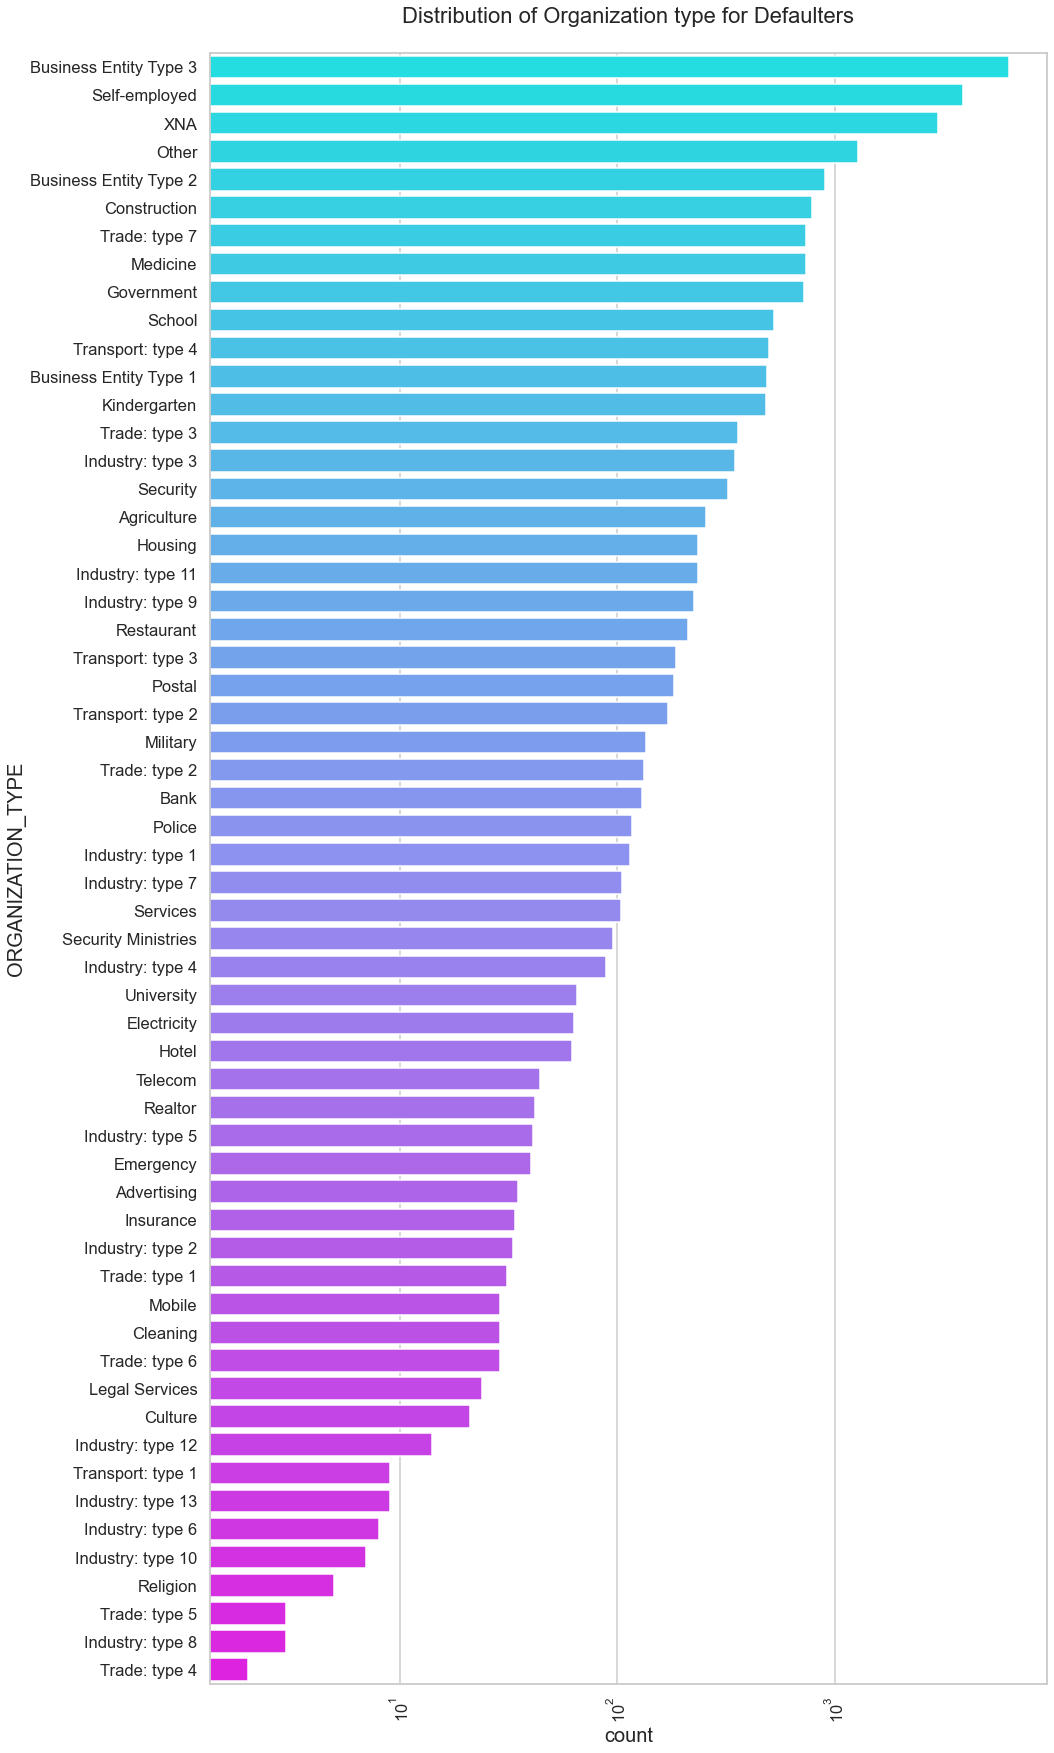

In [43]:
#count plot for Organization type in log scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['axes.labelsize'] = 20

plt.title('Distribution of Organization type for Defaulters')

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1_data, y='ORGANIZATION_TYPE', order=target1_data['ORGANIZATION_TYPE'].value_counts().index , palette='cool')

plt.show()

### Conclusion from above plot:

##### 1.Top 5 categories are 'Business entity Type 3' ,'XNA','Self employed' , 'Other'  and 'Medicine'  which have applied for the loan in case of Repayers
##### 2.Top 5 categories are 'Business entity Type 3' ,'Self employed' ,'XNA' ,'Other'  and 'Business entity Type 2'  which have applied for the loan in case of Repayers
##### 3.We can see Business entity two of teh categories are coming in top 5 in case of Defaulters

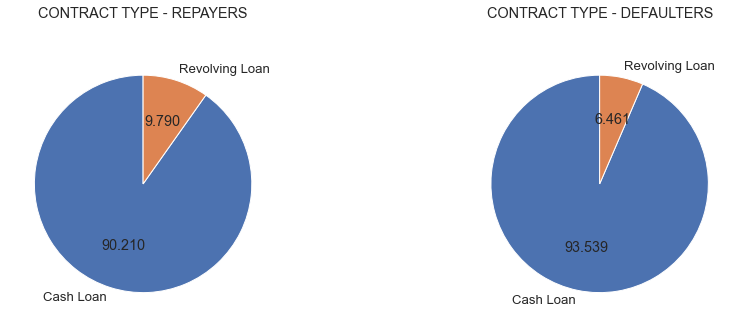

In [44]:
sns.set(font_scale=1.2)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.pie(target0_data['NAME_CONTRACT_TYPE'].value_counts(),startangle=90,autopct='%.3f',labels=['Cash Loan','Revolving Loan'])
plt.title('CONTRACT TYPE - REPAYERS')
plt.subplot(1,2,2)
plt.pie(target1_data['NAME_CONTRACT_TYPE'].value_counts(),startangle=90,autopct='%.3f',labels=['Cash Loan','Revolving Loan'])
plt.title('CONTRACT TYPE - DEFAULTERS')
plt.show()

Observation: Percentage of Cash Loans is more in defaults than Revolving Loans.

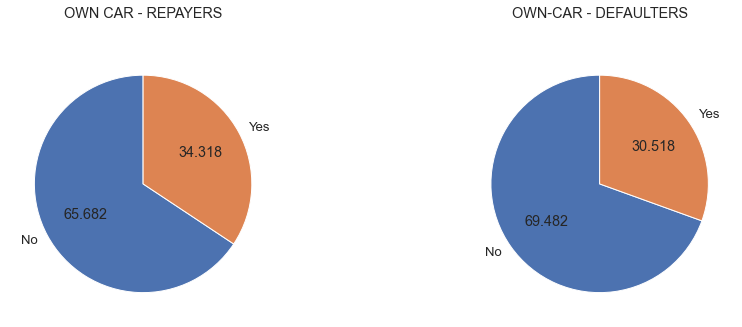

In [45]:
sns.set(font_scale=1.2)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.pie(target0_data['FLAG_OWN_CAR'].value_counts(),startangle=90,autopct='%.3f',labels=['No','Yes'])
plt.title('OWN CAR - REPAYERS')
plt.subplot(1,2,2)
plt.pie(target1_data['FLAG_OWN_CAR'].value_counts(),startangle=90,autopct='%.3f',labels=['No','Yes'])
plt.title('OWN-CAR - DEFAULTERS')
plt.show()

Observation: People who deosn't own care are more in Defaulters.

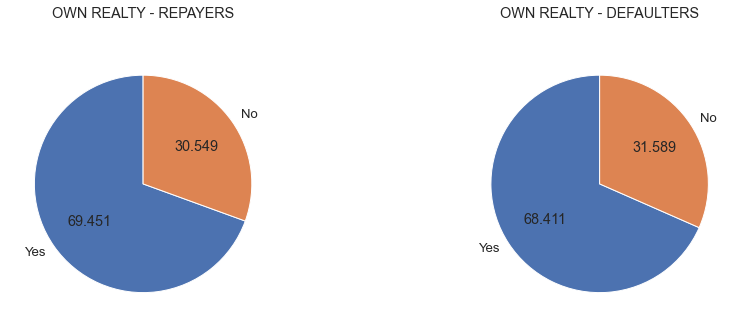

In [46]:
sns.set(font_scale=1.2)
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.pie(target0_data['FLAG_OWN_REALTY'].value_counts(),startangle=90,autopct='%.3f',labels=['Yes','No'])
plt.title('OWN REALTY - REPAYERS')
plt.subplot(1,2,2)
plt.pie(target1_data['FLAG_OWN_REALTY'].value_counts(),startangle=90,autopct='%.3f',labels=['Yes','No'])
plt.title('OWN REALTY - DEFAULTERS')
plt.show()

Defaulters percentage is 1% less for those who own realty but for those who dosen't own reality defaulters percentage is more.

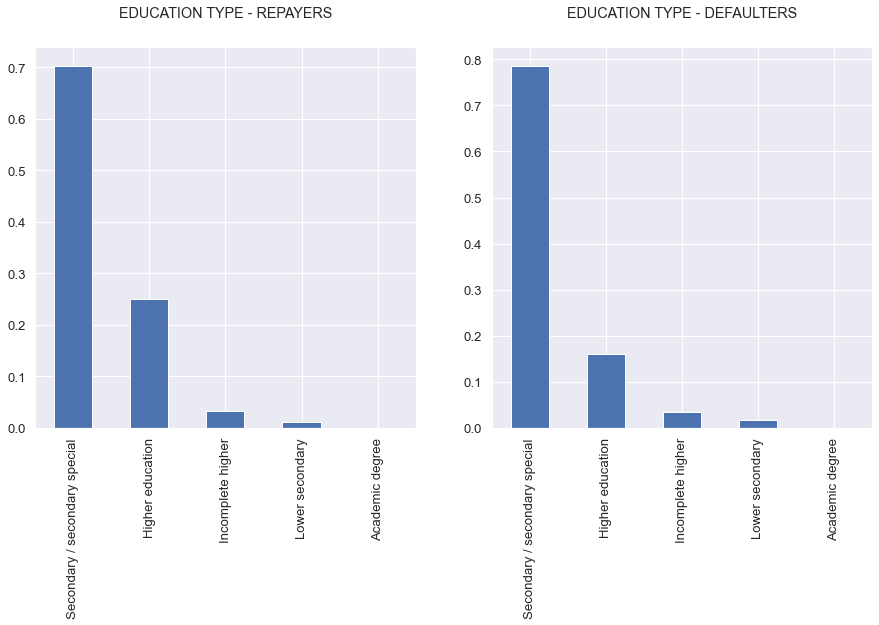

In [47]:
sns.set(font_scale=1.2)
plt.figure(figsize=[15,7])

plt.subplot(1,2,1)
target0_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('EDUCATION TYPE - REPAYERS')
plt.subplot(1,2,2)
target1_data['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.bar()
plt.title('EDUCATION TYPE - DEFAULTERS')
plt.show()

Defaulters are more in case of client with Secondary/Secondary Special education

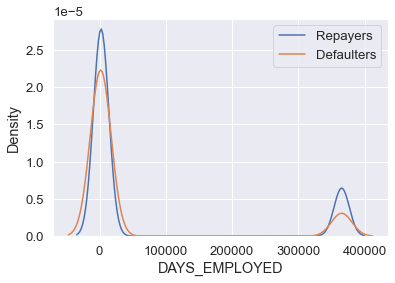

In [48]:
sns.set(font_scale=1.2)
sns.distplot(target0_data['DAYS_EMPLOYED'],hist=False,label='Repayers')
sns.distplot(target1_data['DAYS_EMPLOYED'],hist=False,label='Defaulters')
plt.legend()
plt.show()

People who apply for loan are the ones who either newly changed job or those has been in same compnay for long.

In [49]:
def univariate_variable(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    plt.rcParams['axes.labelsize'] = 20
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data=target1_data, y=col , orient='v')

    plt.show()

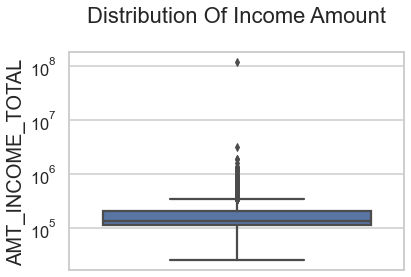

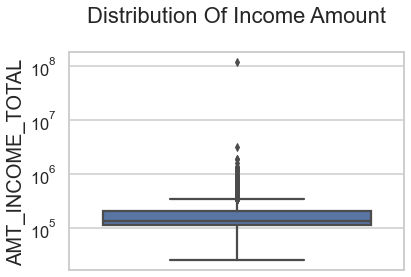

In [50]:

univariate_variable(data= target0_data, col = 'AMT_INCOME_TOTAL',title = 'Distribution Of Income Amount')
univariate_variable(data= target1_data, col = 'AMT_INCOME_TOTAL',title = 'Distribution Of Income Amount')

Conclusion from above Box Plot:

Third quartile is very narrow and has very less values comapre to other quartiles.
Income amount has some outliers.
Maximum income clients are present in first quartile.

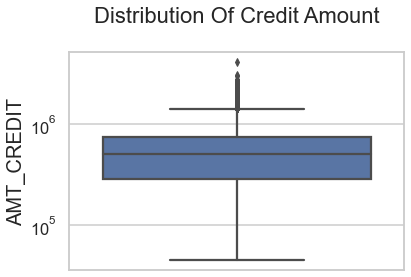

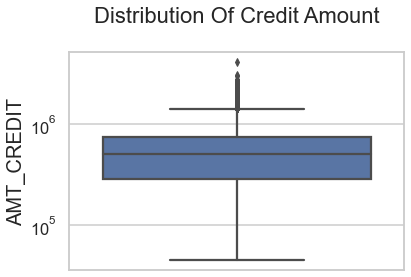

In [51]:
#Distribution of Credit Amount


univariate_variable(data= target0_data, col='AMT_CREDIT', title='Distribution Of Credit Amount')
univariate_variable(data=target1_data, col='AMT_CREDIT', title='Distribution Of Credit Amount')

Conclusion from Credit Amount Box Plot:

Credit amount also has some outliers in it.
As per the box plot first quartile is bigger than 75th quartile for credit amount which means loan of most of people lie in the first quartile.


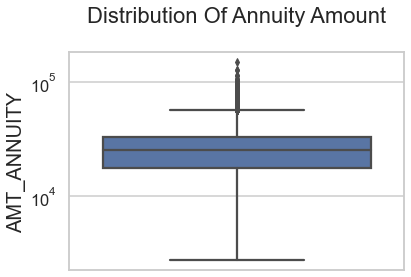

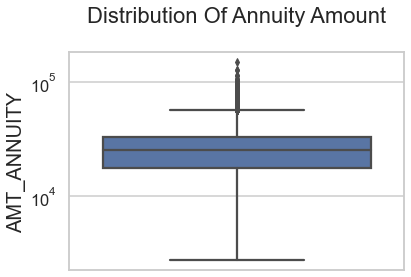

In [52]:
#Distribution of Annuity Amount

univariate_variable(data=target0_data, col = "AMT_ANNUITY" , title="Distribution Of Annuity Amount")
univariate_variable(data=target1_data, col='AMT_ANNUITY' , title='Distribution Of Annuity Amount')


Conclusion from above Box Plot:

Annuity amount has some outliers.
First quartile is bigger than third quartile for annuity amount which means most of the annuity clients are present in first quartile.


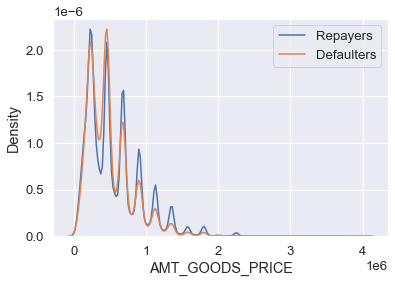

In [53]:
sns.set(font_scale=1.2)
sns.distplot(target0_data['AMT_GOODS_PRICE'],hist=False,label='Repayers')
sns.distplot(target1_data['AMT_GOODS_PRICE'],hist=False,label='Defaulters')
plt.legend()
plt.show()

Amount goods price at around 0.5 defaulters are more than Repayers.

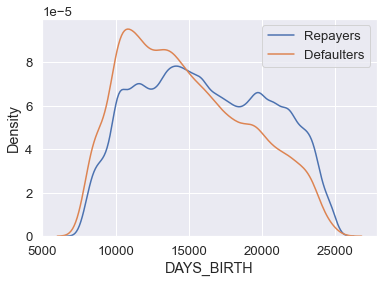

In [54]:
sns.set(font_scale=1.2)
sns.distplot(target0_data['DAYS_BIRTH'],hist=False,label='Repayers')
sns.distplot(target1_data['DAYS_BIRTH'],hist=False,label='Defaulters')
plt.legend()
plt.show()

We can see Defaulters are more when they are of less age.

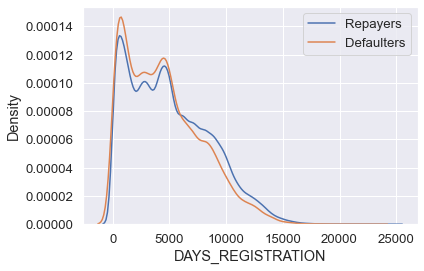

In [55]:
sns.set(font_scale=1.2)
sns.distplot(target0_data['DAYS_REGISTRATION'],hist=False,label='Repayers')
sns.distplot(target1_data['DAYS_REGISTRATION'],hist=False,label='Defaulters')
plt.legend()
plt.show()

Deafulters are more when Registartion days are low.

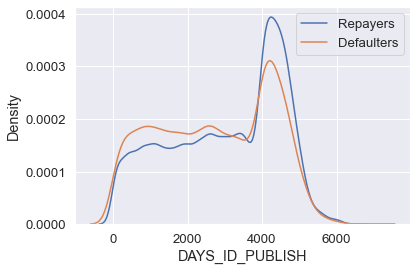

In [56]:
sns.set(font_scale=1.2)
sns.distplot(target0_data['DAYS_ID_PUBLISH'],hist=False,label='Repayers')
sns.distplot(target1_data['DAYS_ID_PUBLISH'],hist=False,label='Defaulters')
plt.legend()
plt.show()

1. When days published is low defaulters are more but when days published is more repayers are more.
2. We can see in case of Days_ID_Publish,Days_Birth and Days_Registration when value is low deafulters are more.

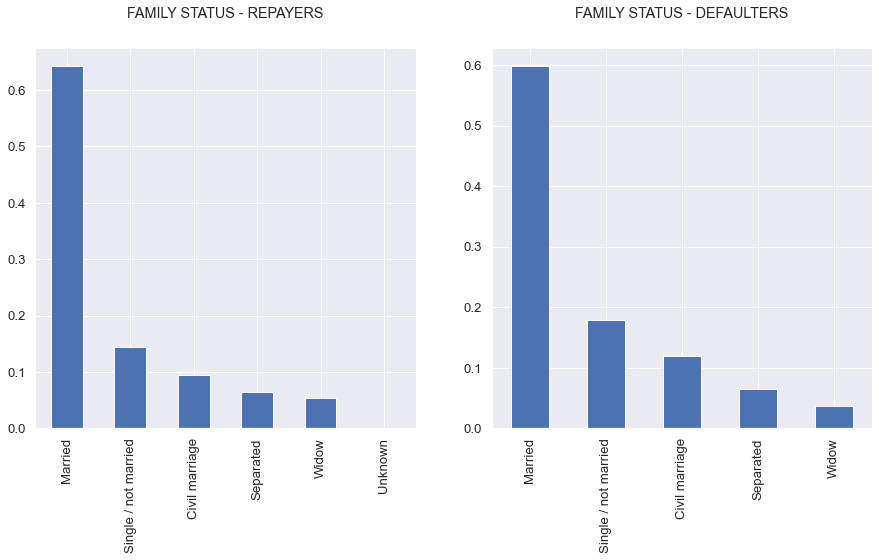

In [57]:
sns.set(font_scale=1.2)
plt.figure(figsize=[15,7])

plt.subplot(1,2,1)
target0_data['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.title('FAMILY STATUS - REPAYERS')
plt.subplot(1,2,2)
target1_data['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.title('FAMILY STATUS - DEFAULTERS')
plt.show()

Percenatge of Single/not married is more in defaulters.

### Bivariate Analysis

In [58]:
#count plot in log scale

def uniplot(df,col,title,hue=None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 30
    plt.rcParams['axes.labelsize'] = 25
    
    temp = pd.Series(data=hue)
    fig,ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width ,7)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df , x=col , order=df[col].value_counts().index,hue = hue , palette='magma')
    plt.show()

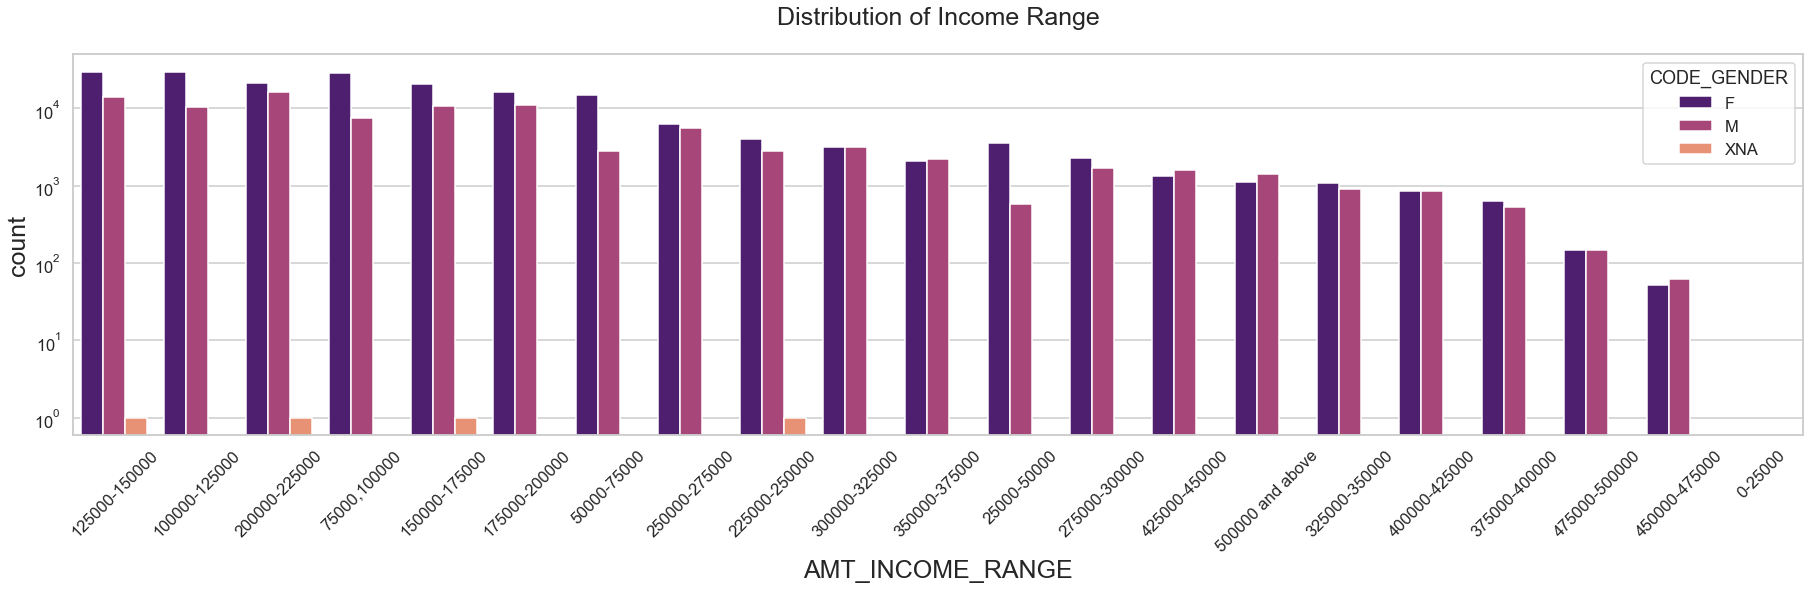

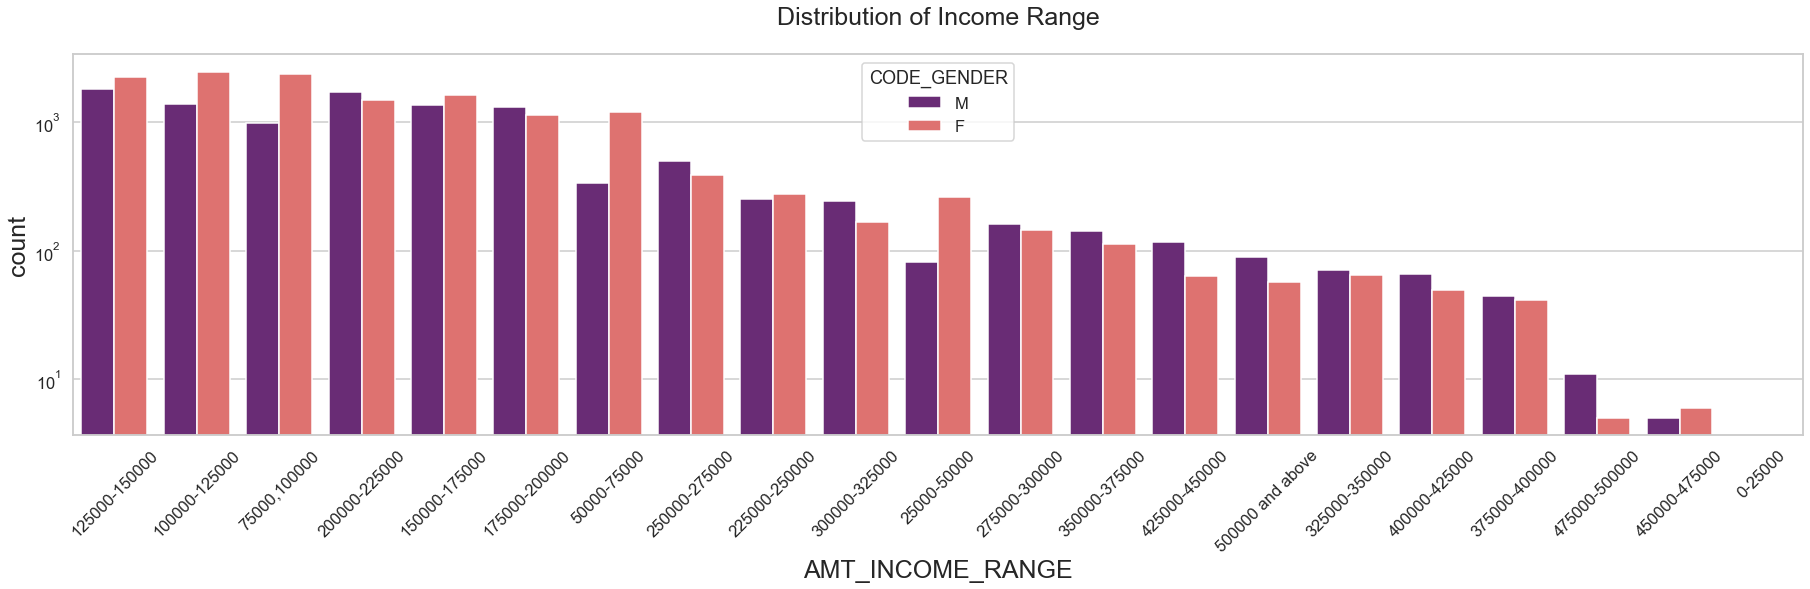

In [59]:
#create plot for AMT_INCOME_RANGE

uniplot(target0_data, col = 'AMT_INCOME_RANGE', title='Distribution of Income Range', hue='CODE_GENDER')
uniplot(target1_data, col = 'AMT_INCOME_RANGE', title='Distribution of Income Range', hue='CODE_GENDER')

## Conclusion from above plot:

  #### 1.Female counts higher than male.
  #### 2.Income range from 100000 to 200000 is having more number of credits.
  #### 3.Plot clearly shows that females are having more credits than males for the same ranges.
  #### 4.On and below 400000 credit count is very less.
  #### 5.For income range 25000-50000 females have way more credits than male.

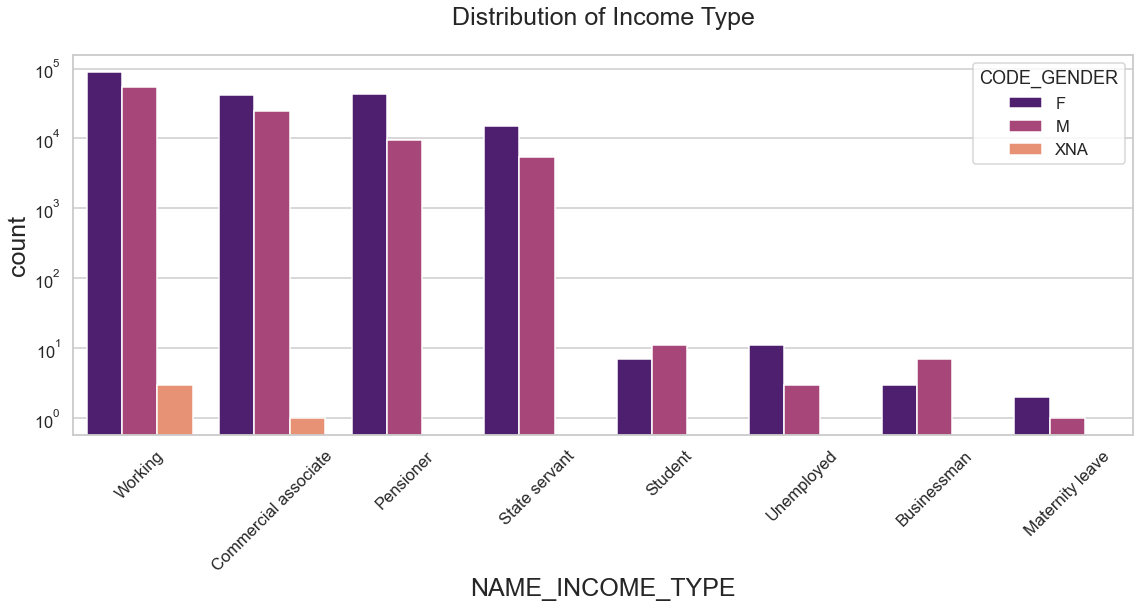

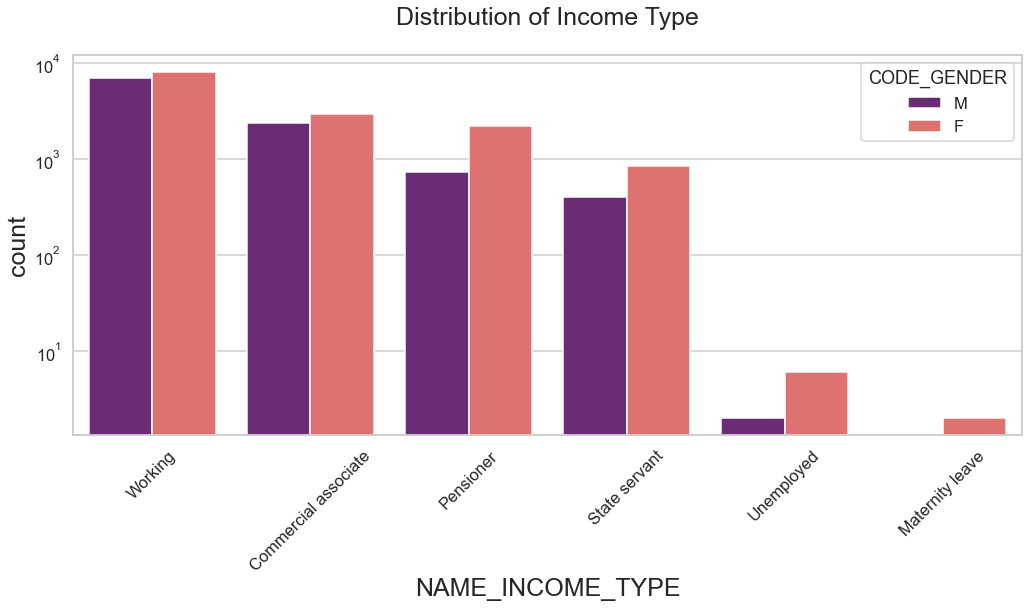

In [60]:
#create plot for NAME_INCOME_TYPE

uniplot(target0_data, col = 'NAME_INCOME_TYPE', title='Distribution of Income Type', hue='CODE_GENDER')
uniplot(target1_data, col = 'NAME_INCOME_TYPE', title='Distribution of Income Type', hue='CODE_GENDER')

Conclusion from above plot:
1.There are cearly there types which are on top in the category or have the higher credit count as comapre to other categories.
2.Here also, Females are having more credits in these top three income types.
3.Student income type is having more credit than Businessman , pensioner and Maternity leaves.

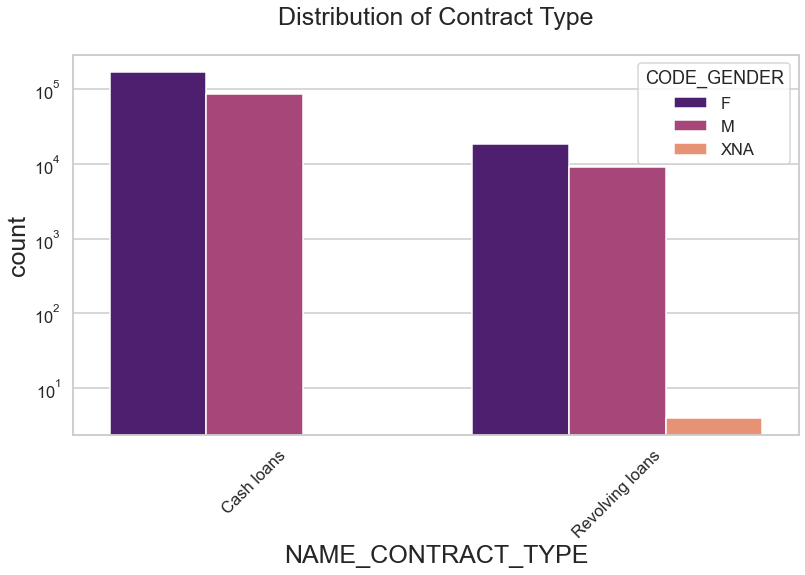

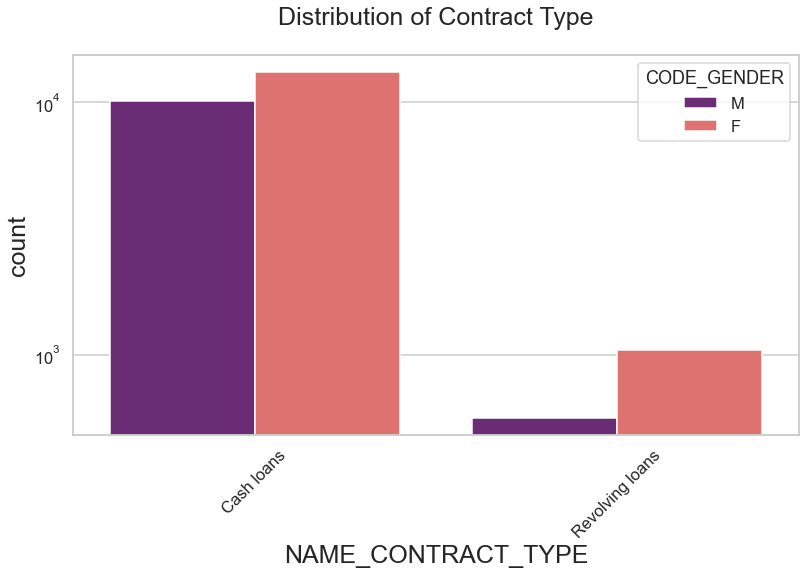

In [61]:
#create plot for Contract type

uniplot(target0_data, col = 'NAME_CONTRACT_TYPE', title='Distribution of Contract Type', hue='CODE_GENDER')


uniplot(target1_data, col = 'NAME_CONTRACT_TYPE', title='Distribution of Contract Type', hue='CODE_GENDER')

### Conclusion from above plot:

  #### 1.'Cash loans' has more credits than 'Revolving loans' contract type.
   #### 2.Also, female category is leading here as well.

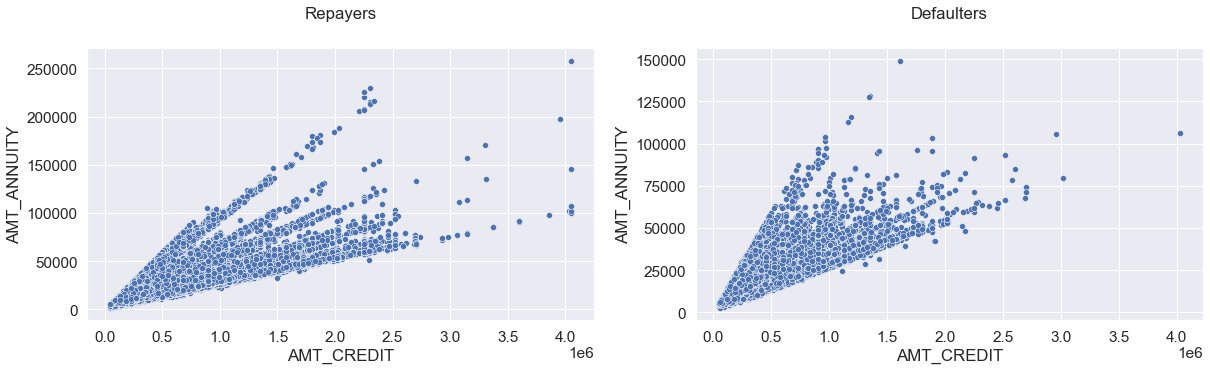

In [62]:
sns.set(font_scale=1.4)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Repayers')
sns.scatterplot(data=target0_data, x="AMT_CREDIT", y="AMT_ANNUITY")
plt.subplot(1,2,2)
plt.title('Defaulters')
sns.scatterplot(data=target1_data, x="AMT_CREDIT", y="AMT_ANNUITY")
plt.show()

In case of Defaulters we can see Annuity is more when compared with Repayers.

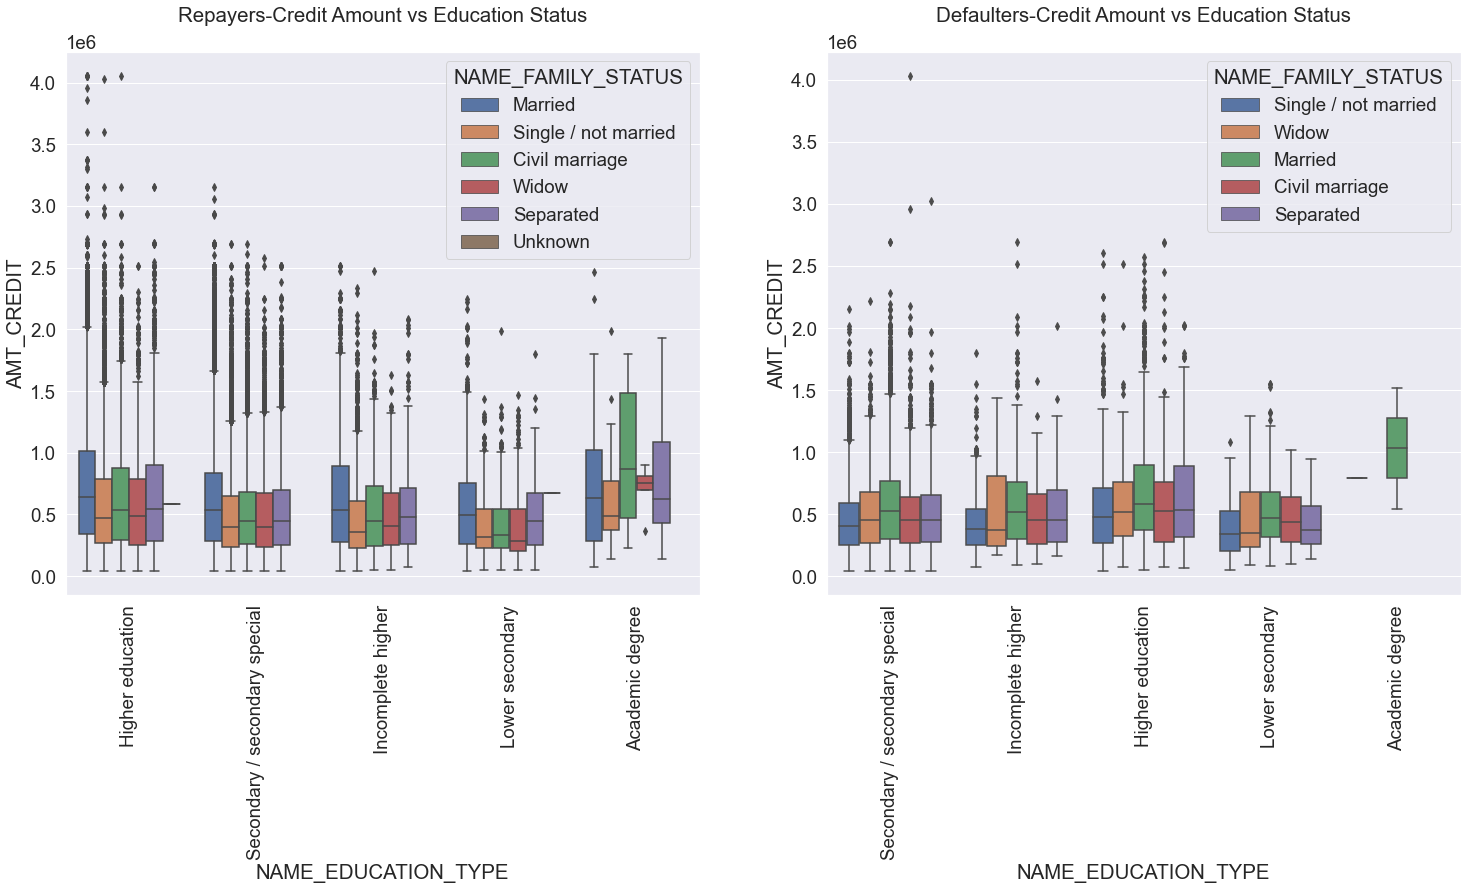

In [63]:
#Box Plot for Credit Amount
sns.set(font_scale=1.7)
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(data=target0_data , x= 'NAME_EDUCATION_TYPE', y="AMT_CREDIT", hue='NAME_FAMILY_STATUS', orient='v')
plt.xticks(rotation= 90)
plt.title('Repayers-Credit Amount vs Education Status')
plt.subplot(1,2,2)
sns.boxplot(data=target1_data , x= 'NAME_EDUCATION_TYPE', y="AMT_CREDIT", hue='NAME_FAMILY_STATUS', orient='v')
plt.xticks(rotation= 90)
plt.title('Defaulters-Credit Amount vs Education Status')
plt.show()

Conclusion from above Box Plot :


Repayers:
1. Clients with Academic degree and with Family Status of 'Civil marriage' , 'Married', 'Separated' are having higher credits than others.
2. Clients with Higher education and with Family Status of 'Married' ,'Single', 'Civil Marriage' are having more outliers.
3. Civil Marriage for Academic degree is having most of the credits in the third quartile.
4. Widow for Academic degree is having least number of credits in third quartile.


Defaulters:
1. For Academic degree only 'Married' Family Status has some significant and highest credits.
2. Higher Education, Secondary Education , Incomplete Higher are the top 3 categories with outliers.
3. For Higher Education 'Marrie' Family status has maximum credits in first quartile.

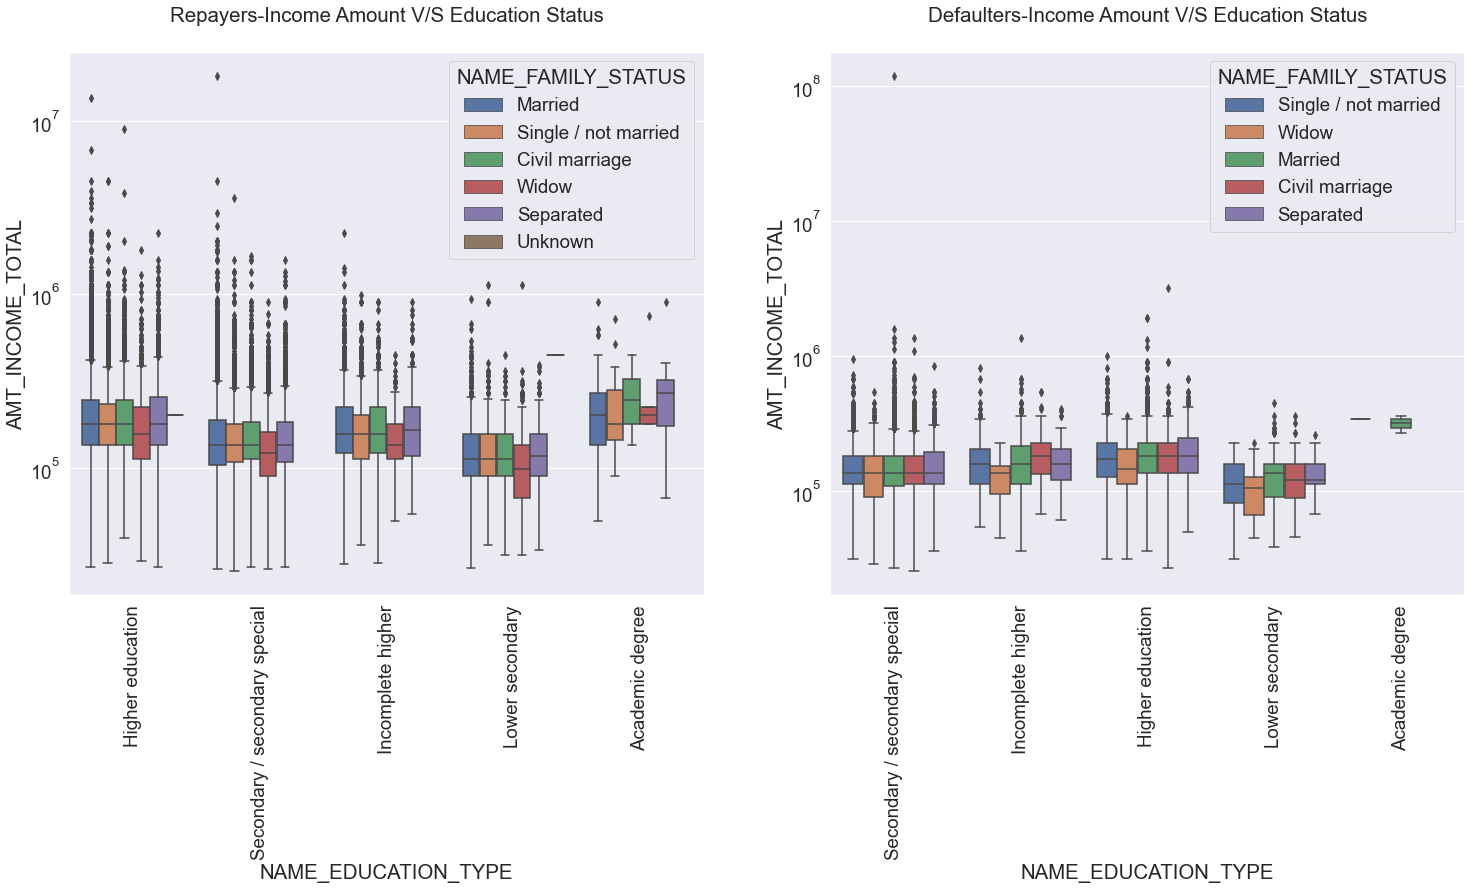

In [64]:
#Box Plot for Income Amount in log scale
sns.set(font_scale=1.7)
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data=target0_data , x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL' , hue='NAME_FAMILY_STATUS', orient= 'v')
plt.xticks(rotation= 90)
plt.title('Repayers-Income Amount V/S Education Status')
plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data=target1_data , x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL' , hue='NAME_FAMILY_STATUS', orient= 'v')
plt.xticks(rotation= 90)
plt.title('Defaulters-Income Amount V/S Education Status')


plt.show()

Conclusion from above Box Plot:

Repayers:

1. Married with Secondary special having maximum outliers among all categories.
2. Academic Degree has minimum outliers.
3. For higher education each Family Status category has equal Income.

Defaulters:

1. Total income also has outliers.
2. Higher educatoin each family status has the equal income.
3. Higher education has the same mean for each family status.
4. Secondary education also has the same mean for each family status.

In [65]:
target0_data.sort_values(by=['OCCUPATION_TYPE'],ascending=True,inplace=True)
target1_data.sort_values(by=['OCCUPATION_TYPE'],ascending=True,inplace=True)

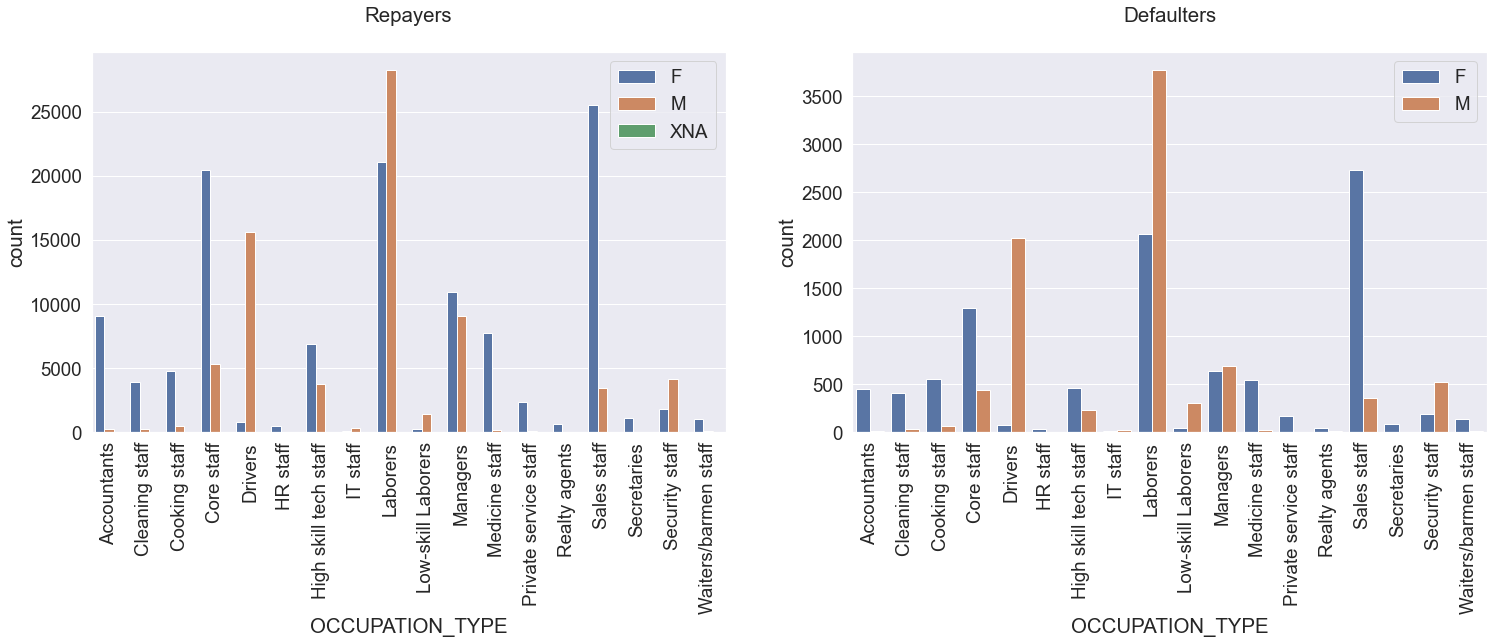

In [66]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.title('Repayers')
plt.xticks(rotation= 90)
sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=target0_data)
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.title('Defaulters')
plt.xticks(rotation= 90)
sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=target1_data)
plt.legend(loc='upper right')

plt.show()


1. People with occupation type Labrores are in maximum number.Then its Sales staff.
2. In case of Defaulters we can see Male drivers are more tha Female Core Staff.In case of Repayers Female COre staff is more than male Drivers.


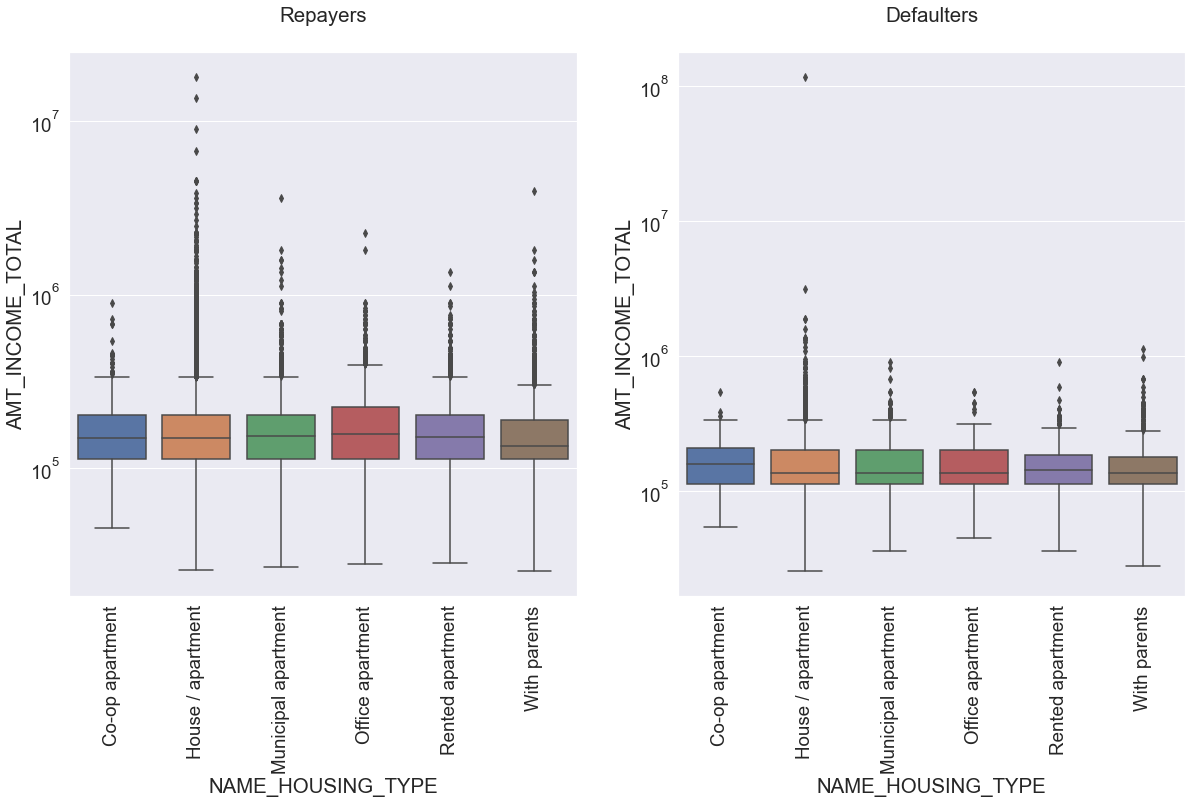

In [67]:
target0_data.sort_values(by=['NAME_HOUSING_TYPE'],ascending=True,inplace=True)
target1_data.sort_values(by=['NAME_HOUSING_TYPE'],ascending=True,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.yscale('log')
plt.title('Repayers')
sns.boxplot(x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',data=target0_data)
plt.xticks(rotation= 90)
plt.subplot(1,2,2)
plt.title('Defaulters')
plt.yscale('log')
sns.boxplot(x='NAME_HOUSING_TYPE',y='AMT_INCOME_TOTAL',data=target1_data)
plt.xticks(rotation= 90)
plt.show()

1. Co-op apartment in case of Repayers there are more outliers than Defaulters and in both the case first quartile has more data.
2. House/Apartment in Repayers has most outliers.

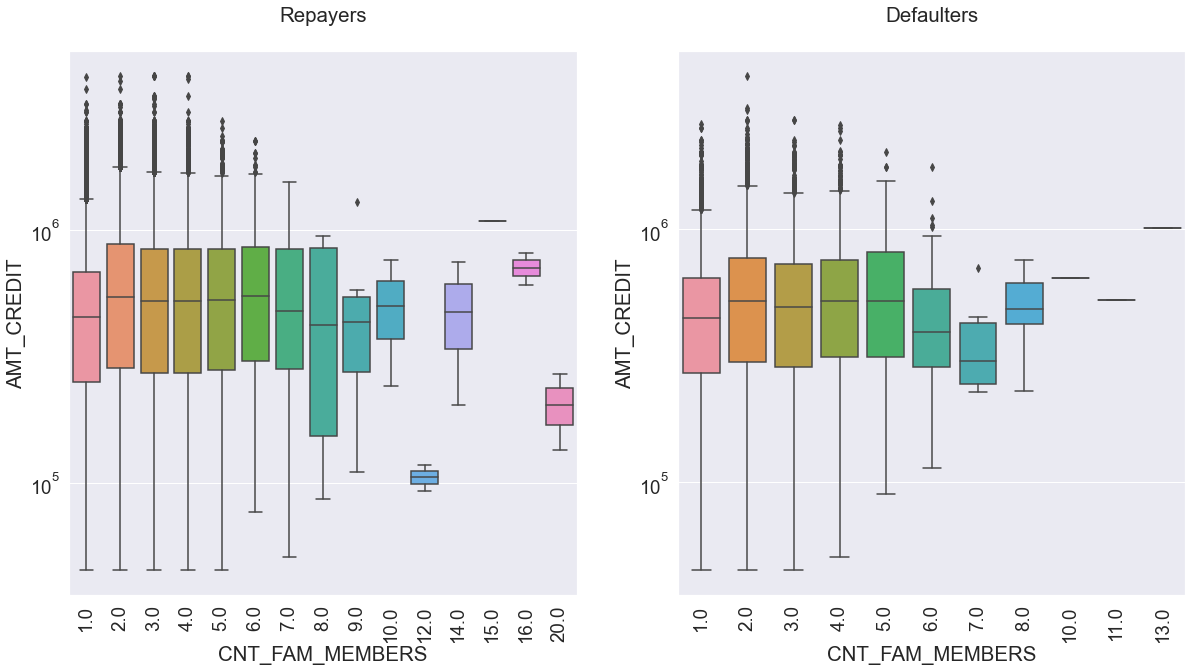

In [68]:
target0_data.sort_values(by=['CNT_FAM_MEMBERS'],ascending=True,inplace=True)
target1_data.sort_values(by=['CNT_FAM_MEMBERS'],ascending=True,inplace=True)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.yscale('log')
plt.title('Repayers')
sns.boxplot(x='CNT_FAM_MEMBERS',y='AMT_CREDIT',data=target0_data)
plt.xticks(rotation= 90)
plt.subplot(1,2,2)
plt.title('Defaulters')
plt.yscale('log')
sns.boxplot(x='CNT_FAM_MEMBERS',y='AMT_CREDIT',data=target1_data)
plt.xticks(rotation= 90)
plt.show()

All the data has most of the values in first quartile.

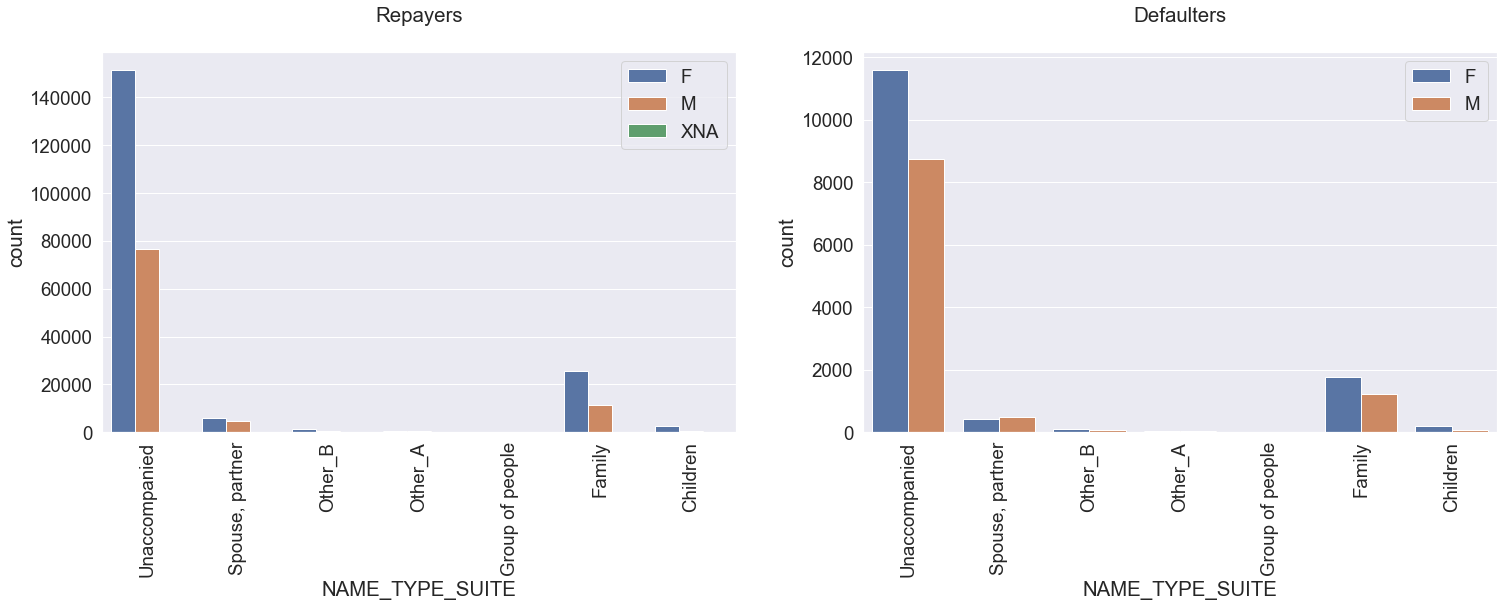

In [69]:
target0_data.sort_values(by=['NAME_TYPE_SUITE'],ascending=False,inplace=True)
target1_data.sort_values(by=['NAME_TYPE_SUITE'],ascending=False,inplace=True)
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.title('Repayers')
plt.xticks(rotation= 90)
sns.countplot(x='NAME_TYPE_SUITE',hue='CODE_GENDER',data=target0_data)
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.title('Defaulters')
plt.xticks(rotation= 90)
sns.countplot(x='NAME_TYPE_SUITE',hue='CODE_GENDER',data=target1_data)
plt.legend(loc='upper right')

plt.show()


1. More defaulters are Female Unaccompanied people.
2. In case of Family also Female are more defaulters than male.

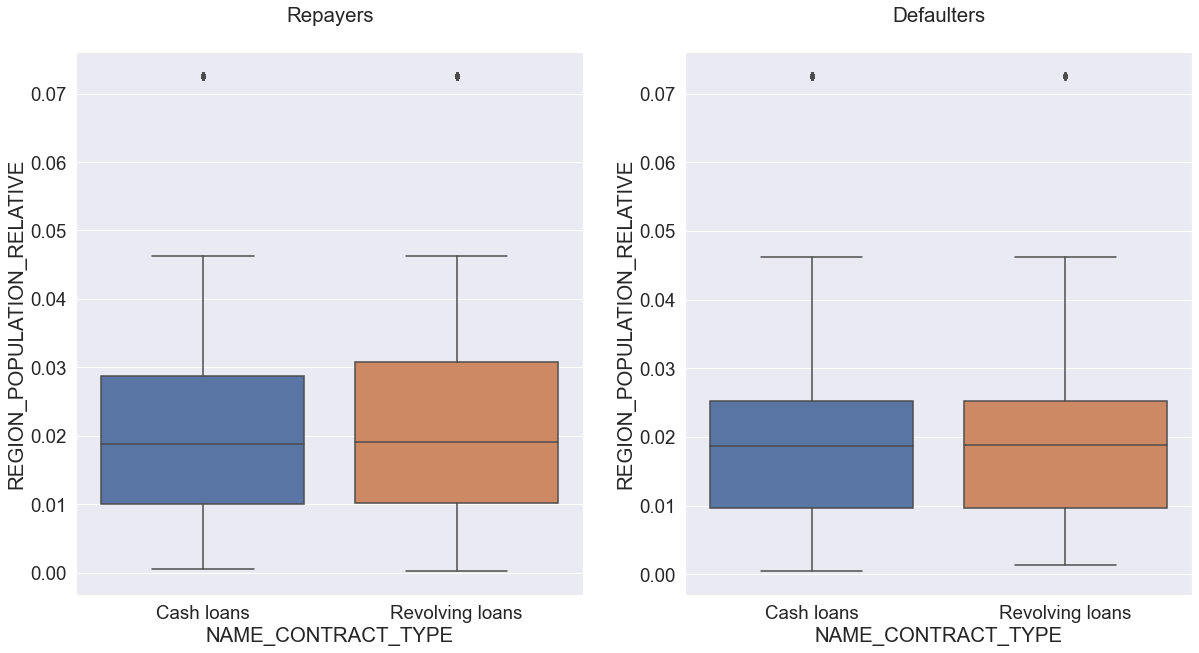

In [70]:

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title('Repayers')
sns.boxplot(x='NAME_CONTRACT_TYPE',y='REGION_POPULATION_RELATIVE',data=target0_data)

plt.subplot(1,2,2)
plt.title('Defaulters')


sns.boxplot(x='NAME_CONTRACT_TYPE',y='REGION_POPULATION_RELATIVE',data=target1_data)

plt.show()

1. For both cash loans and revolving loans in case of Repayers lower part below the median is small when compared to upper part.
2. For Defaulters lower part below median is large when compared to upper part.
3. We can say people in densely populated are is less likely to default.

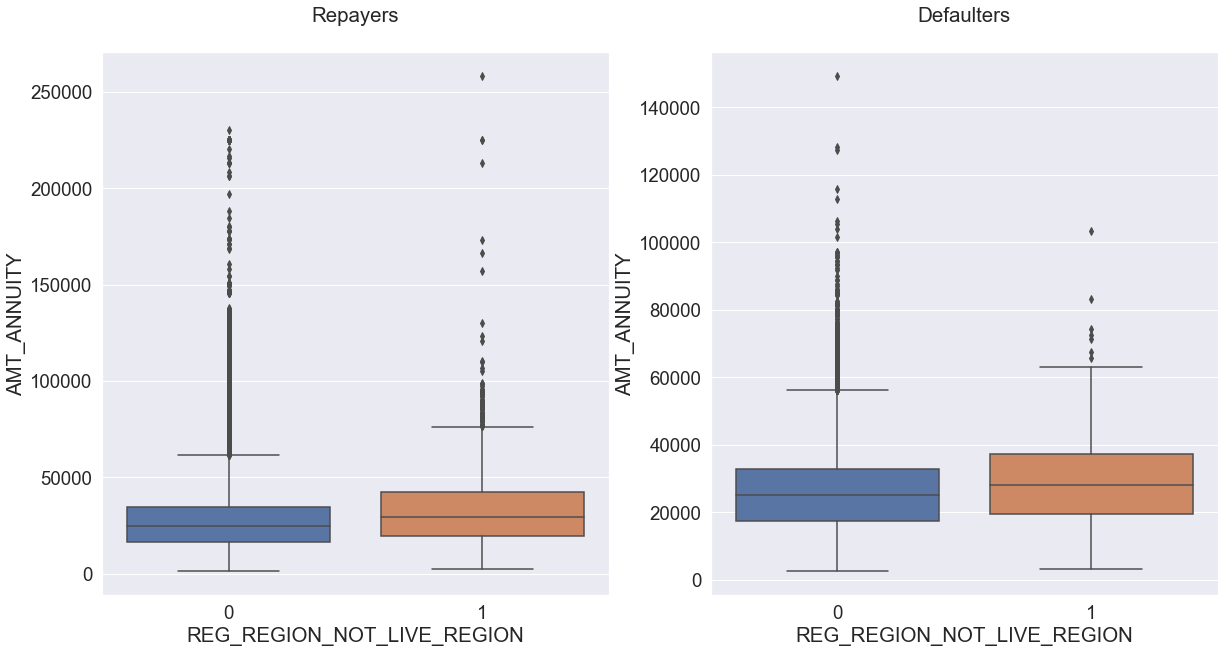

In [71]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title('Repayers')
sns.boxplot(x='REG_REGION_NOT_LIVE_REGION',y='AMT_ANNUITY',data=target0_data)

plt.subplot(1,2,2)
plt.title('Defaulters')

sns.boxplot(x='REG_REGION_NOT_LIVE_REGION',y='AMT_ANNUITY',data=target1_data)

plt.show()

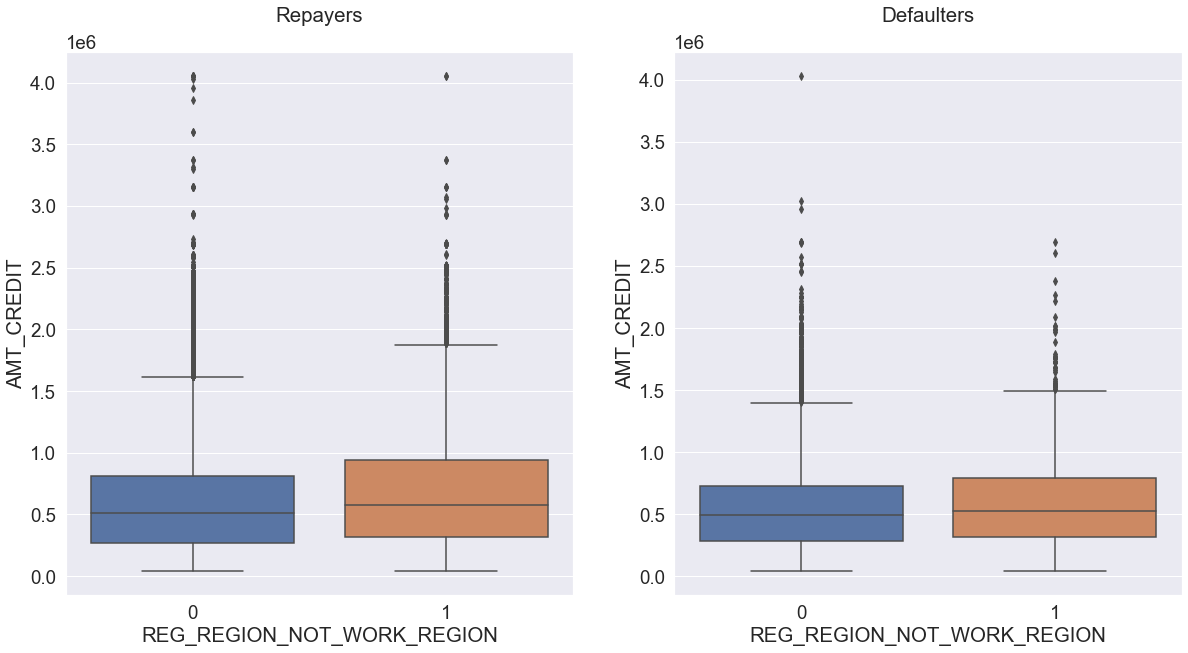

In [72]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title('Repayers')
sns.boxplot(x='REG_REGION_NOT_WORK_REGION',y='AMT_CREDIT',data=target0_data)

plt.subplot(1,2,2)
plt.title('Defaulters')

sns.boxplot(x='REG_REGION_NOT_WORK_REGION',y='AMT_CREDIT',data=target1_data)

plt.show()

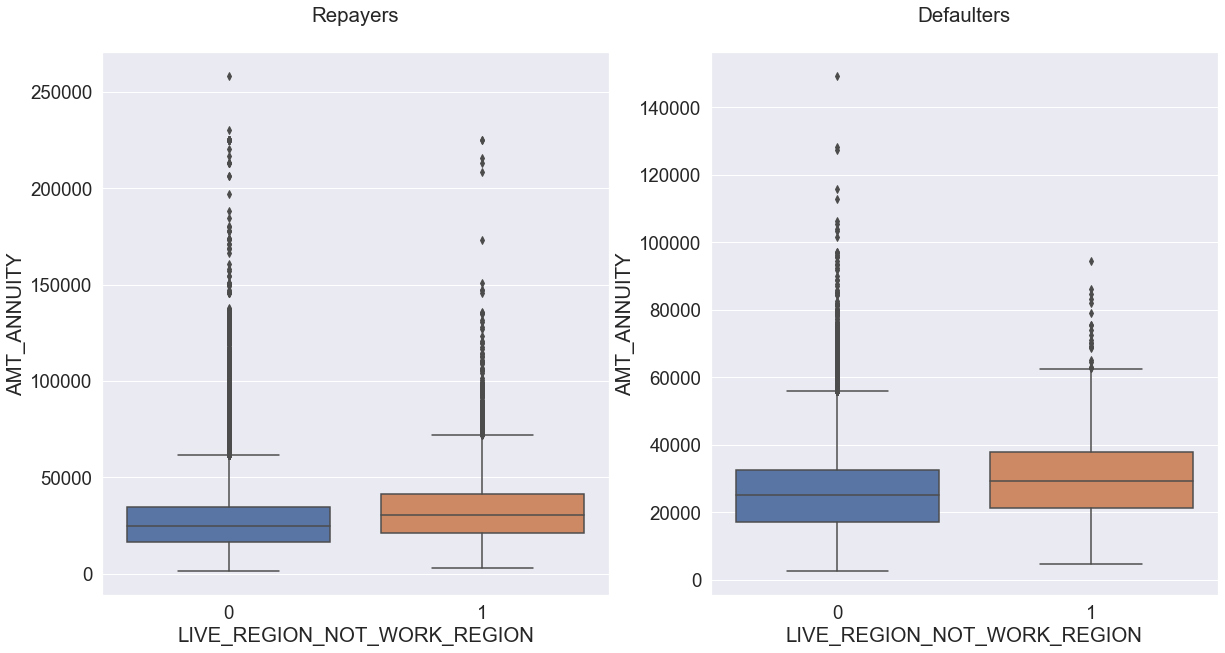

In [73]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title('Repayers')
sns.boxplot(x='LIVE_REGION_NOT_WORK_REGION',y='AMT_ANNUITY',data=target0_data)

plt.subplot(1,2,2)
plt.title('Defaulters')

sns.boxplot(x='LIVE_REGION_NOT_WORK_REGION',y='AMT_ANNUITY',data=target1_data)

plt.show()

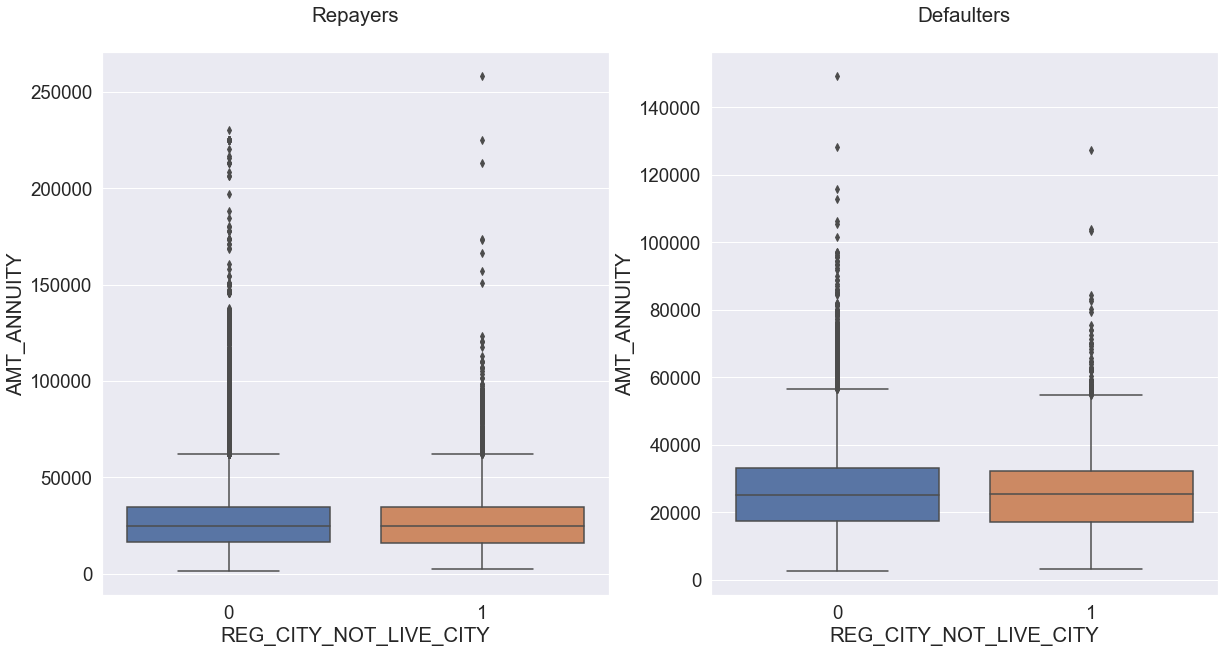

In [74]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title('Repayers')
sns.boxplot(x='REG_CITY_NOT_LIVE_CITY',y='AMT_ANNUITY',data=target0_data)

plt.subplot(1,2,2)
plt.title('Defaulters')

sns.boxplot(x='REG_CITY_NOT_LIVE_CITY',y='AMT_ANNUITY',data=target1_data)

plt.show()

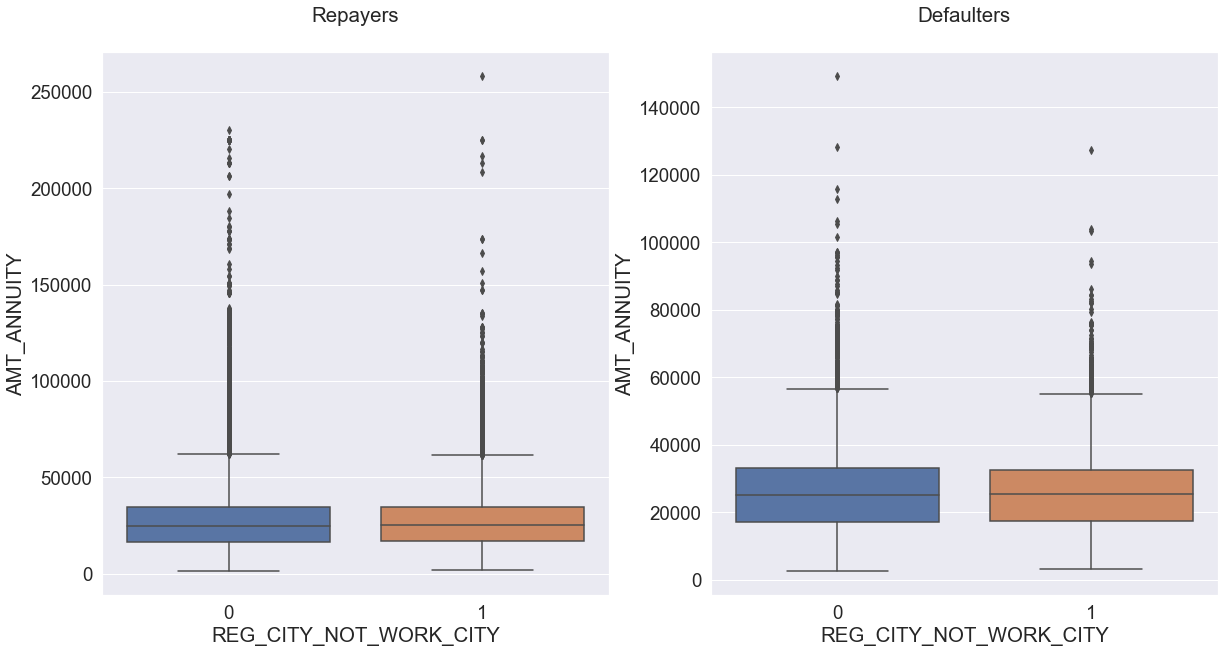

In [75]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title('Repayers')
sns.boxplot(x='REG_CITY_NOT_WORK_CITY',y='AMT_ANNUITY',data=target0_data)

plt.subplot(1,2,2)
plt.title('Defaulters')

sns.boxplot(x='REG_CITY_NOT_WORK_CITY',y='AMT_ANNUITY',data=target1_data)

plt.show()

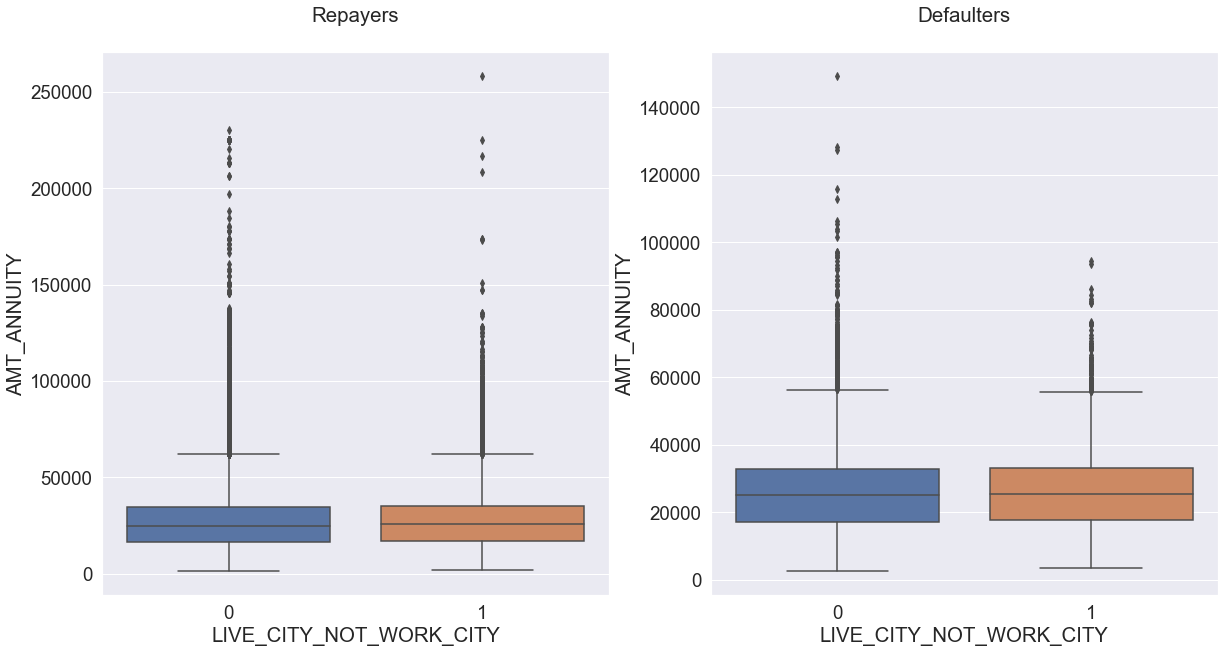

In [76]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.title('Repayers')
sns.boxplot(x='LIVE_CITY_NOT_WORK_CITY',y='AMT_ANNUITY',data=target0_data)

plt.subplot(1,2,2)
plt.title('Defaulters')

sns.boxplot(x='LIVE_CITY_NOT_WORK_CITY',y='AMT_ANNUITY',data=target1_data)

plt.show()

In [77]:
#Let's try to find any correlation for numerical columns for both target0 and target1

target0_correlation = target0_data.iloc[0:,2:]
target1_correlation = target1_data.iloc[0:,2:]

target0 = target0_correlation.corr(method='spearman')
target1 = target1_correlation.corr(method='spearman')

In [78]:
#target0 correlation

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001293,-0.025551,-0.375639,-0.205693,-0.180517,0.019986,0.810519,-0.010738,0.015455,0.021523,0.027788,0.076212,0.071585
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485699,0.419929,0.097772,-0.093515,-0.095898,-0.076387,-0.035931,0.044988,0.078372,0.161441,0.148976,0.020368,0.040087,0.040321
AMT_CREDIT,0.002315,0.416017,1.000000,0.831900,0.985510,0.053570,0.057151,0.017986,-0.009416,0.001982,0.079496,0.019093,0.045430,0.047740,-0.026649,-0.012662,0.006972
AMT_ANNUITY,0.024767,0.485699,0.831900,1.000000,0.830368,0.058591,-0.011740,-0.030195,-0.037717,-0.016569,0.096422,0.035823,0.075783,0.073054,-0.004963,0.009717,0.019451
AMT_GOODS_PRICE,-0.001293,0.419929,0.985510,0.830368,1.000000,0.062650,0.058256,0.022659,-0.009528,0.004018,0.079388,0.020410,0.046406,0.048089,-0.028152,-0.015453,0.004685
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062650,1.000000,0.030730,-0.003651,0.036684,0.010463,-0.017711,-0.019922,0.029206,0.051195,-0.045545,-0.029350,-0.005476
DAYS_BIRTH,-0.375639,-0.093515,0.057151,-0.011740,0.058256,0.030730,1.000000,0.583711,0.298130,0.261979,-0.282408,-0.066377,-0.096421,-0.070065,-0.180952,-0.239113,-0.156588
DAYS_EMPLOYED,-0.205693,-0.095898,0.017986,-0.030195,0.022659,-0.003651,0.583711,1.000000,0.201306,0.259900,-0.152194,-0.071272,-0.137882,-0.112790,-0.145590,-0.262852,-0.198795
DAYS_REGISTRATION,-0.180517,-0.076387,-0.009416,-0.037717,-0.009528,0.036684,0.298130,0.201306,1.000000,0.094153,-0.159042,-0.025938,-0.032723,-0.024163,-0.055307,-0.085865,-0.062442
DAYS_ID_PUBLISH,0.019986,-0.035931,0.001982,-0.016569,0.004018,0.010463,0.261979,0.259900,0.094153,1.000000,0.014034,-0.035392,-0.049195,-0.034776,-0.077360,-0.101050,-0.062976


In [79]:
#target1 correlation

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007572,-0.031628,-0.267862,-0.127943,-0.133658,0.027320,0.823307,-0.025824,-0.019571,-0.009823,0.004127,0.047486,0.051352
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362780,0.051463,0.007238,-0.036127,-0.036671,0.005929,0.003867,0.076449,0.156053,0.144970,0.008996,0.027994,0.030864
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.977224,0.039919,0.155216,0.082434,0.017099,0.053780,0.067447,0.014192,0.030331,0.032564,-0.028544,-0.029571,-0.011182
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804931,0.023297,0.030483,-0.003396,-0.035900,0.014472,0.088604,0.030930,0.063880,0.062370,-0.002849,0.007397,0.014922
AMT_GOODS_PRICE,-0.007572,0.362780,0.977224,0.804931,1.000000,0.054140,0.157778,0.092648,0.019172,0.059736,0.064627,0.016977,0.033732,0.034991,-0.030182,-0.032558,-0.012560
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054140,1.000000,0.046398,0.020003,0.034315,0.023668,-0.022721,-0.032472,-0.009009,0.010621,-0.057083,-0.044331,-0.016447
DAYS_BIRTH,-0.267862,0.007238,0.155216,0.030483,0.157778,0.046398,1.000000,0.466526,0.232940,0.251626,-0.172208,-0.055835,-0.064540,-0.039911,-0.165372,-0.203415,-0.108966
DAYS_EMPLOYED,-0.127943,-0.036127,0.082434,-0.003396,0.092648,0.020003,0.466526,1.000000,0.148988,0.209881,-0.072859,-0.075600,-0.118454,-0.090170,-0.144260,-0.249624,-0.167530
DAYS_REGISTRATION,-0.133658,-0.036671,0.017099,-0.035900,0.019172,0.034315,0.232940,0.148988,1.000000,0.095750,-0.126736,-0.015237,-0.014323,-0.010359,-0.033891,-0.071324,-0.052747
DAYS_ID_PUBLISH,0.027320,0.005929,0.053780,0.014472,0.059736,0.023668,0.251626,0.209881,0.095750,1.000000,0.029132,-0.032654,-0.032845,-0.019967,-0.068605,-0.070867,-0.031407


In [80]:
#let's now try to show this correlation through heat map

def correlation_target(data,title):
    plt.figure(figsize=(10,8))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70
    
    sns.heatmap(data, cmap='RdYlGn')
    
    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

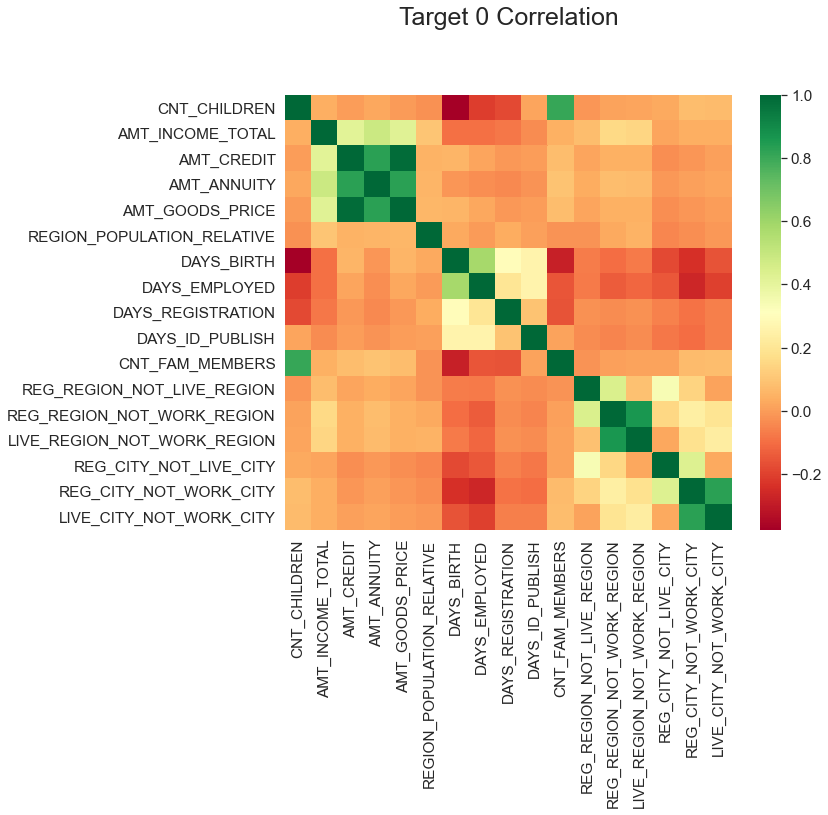

In [81]:
#Heat map for target 0
sns.set(font_scale=1.4)
correlation_target(data=target0, title ='Target 0 Correlation')

Conclusion from above Target0 correlation Heat Map:

1. Credit amount is inversely proportional to the number of children client have, that means Credit amount is higher for less children count client have and vice-versa.
2. Income amount is inversely proportional to the number of children customers have, that means more income for less children customers have and vice-versa.
3. Customers with less children have in densely populated area.
4. Credit amount is higher to densely populated area.
5. The income is also higher in densely populated area.

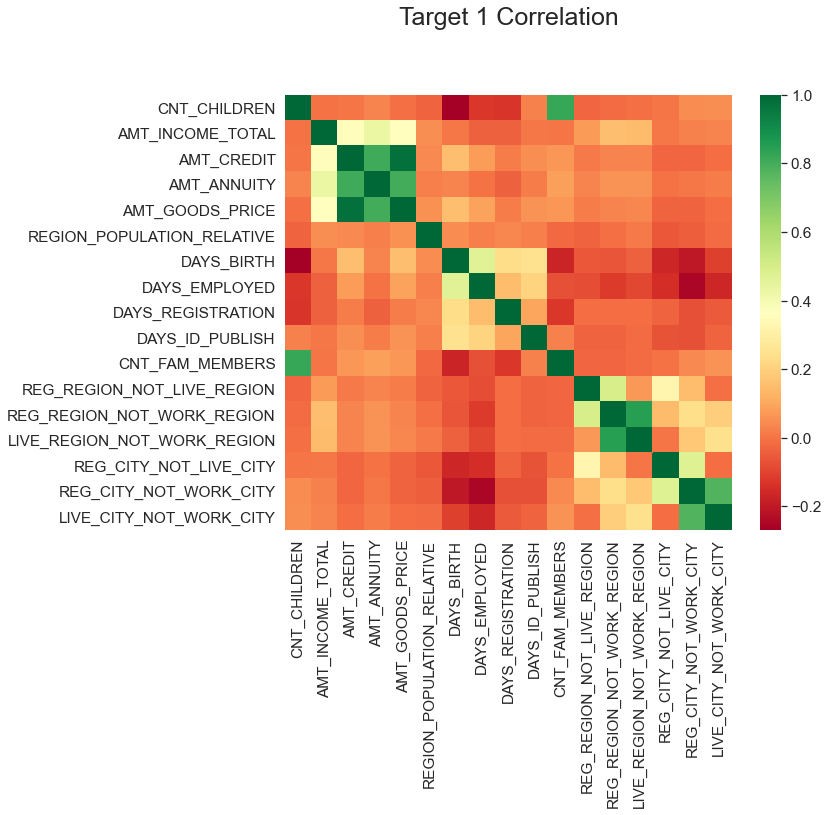

In [82]:
#Heat map for target 0
sns.set(font_scale=1.4)
correlation_target(data=target1, title ='Target 1 Correlation')

Conclusion from above Target1 Heatmap:

1. Customer's permanent address does not match work address are having less children and vice-versa.
2. Customer's permanent address does not match contact address are having less children and vice-versa.

In [83]:
#Top 10 corerealtion for Repayers
corr = target0_data.corr() 
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'], 2)
corr_df['Correlation'] = abs(corr_df['Correlation'])
corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
118,AMT_GOODS_PRICE,AMT_CREDIT,0.99
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
299,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
359,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
99,AMT_ANNUITY,AMT_CREDIT,0.77
179,DAYS_EMPLOYED,DAYS_BIRTH,0.63
279,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.45
339,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.44
98,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42


In [84]:
#Top 10 corerealtion for Defaulter

corr = target1_data.corr() 
corr_df = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index()
corr_df.columns = ['Var1', 'Var2', 'Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df['Correlation'] = round(corr_df['Correlation'], 2)
corr_df['Correlation'] = abs(corr_df['Correlation'])
corr_df.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
118,AMT_GOODS_PRICE,AMT_CREDIT,0.98
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
299,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
359,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
99,AMT_ANNUITY,AMT_CREDIT,0.75
119,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
179,DAYS_EMPLOYED,DAYS_BIRTH,0.58
279,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.50
339,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47
317,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.32


For deafulters we as see REG_CITY_NOT_LIVE_CITY and REG_REGION_NOT_LIVE_REGION,DAYS_REGISTRATION and DAYS_BIRTH is coming in Top 10 correaltion.

### Let's go through the previous_application.csv

In [85]:

prev_app_data = pd.read_csv("previous_application.csv")

In [86]:
prev_app_data.shape

(1670214, 37)

In [87]:
#let's view the previous_application.csv  data

prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#info of previous_application.csv
prev_app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

#### Data cleaning for previous_application.csv ####

In [89]:
(prev_app_data.isnull().sum()*100)/len(prev_app_data)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [90]:
#listing the null vlaues above 50%

prev_app_null_val = (prev_app_data.isnull().sum()*100)/len(prev_app_data)
len(prev_app_null_val[prev_app_null_val >=50])

4

In [91]:
#list of the columns having null values greater than 30%

rem = list(prev_app_null_val[prev_app_null_val >50].index)
rem

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED']

In [92]:
#Dropping the columns having null values more than 30%
prev_app_data = prev_app_data.drop(columns= rem)
prev_app_data.shape

(1670214, 33)

In [93]:
#merge previous_application and application_data

new_data = pd.merge(left=app_data, right=prev_app_data, how='inner', on='SK_ID_CURR', suffixes='+x')

list(new_data.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE+',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT+',
 'AMT_ANNUITY+',
 'AMT_GOODS_PRICE+',
 'NAME_TYPE_SUITE+',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'SK_ID_PREV',
 'NAME_CONTRACT_TYPEx',
 'AMT_ANNUITYx',
 'AMT_APPLICATION',
 'AMT_CREDITx',
 'AMT_GOODS_PRICEx',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_

In [94]:
#Rename the columns after merging botht he dataframes
new_data1 = new_data.rename({'NAME_CONTRACT_TYPE+' : 'NAME_CONTRACT_TYPE',
 'AMT_CREDIT+' :'AMT_CREDIT',
 'WEEKDAY_APPR_PROCESS_START+' :'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START+' : 'HOUR_APPR_PROCESS_START',
 'NAME_CONTRACT_TYPEx' : 'NAME_CONTRACT_TYPE_PREV',
 'AMT_CREDITx' : 'AMT_CREDIT_PREV',
 'WEEKDAY_APPR_PROCESS_STARTx' : 'WEEKDAY_APPR_PROCESS_START_PREV',
 'HOUR_APPR_PROCESS_STARTx' : 'HOUR_APPR_PROCESS_START_PREV'
 }, axis=1)

In [95]:
list(new_data1.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY+',
 'AMT_GOODS_PRICE+',
 'NAME_TYPE_SUITE+',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_RANGE',
 'AMT_CREDIT_RANGE',
 'SK_ID_PREV',
 'NAME_CONTRACT_TYPE_PREV',
 'AMT_ANNUITYx',
 'AMT_APPLICATION',
 'AMT_CREDIT_PREV',
 'AMT_GOODS_PRICEx',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 

In [96]:
#remove all the columns which are not required

new_data1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START',
                'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                'LIVE_CITY_NOT_WORK_CITY','FLAG_LAST_APPL_PER_CONTRACT',
                'NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

In [97]:
new_data1

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY+,AMT_GOODS_PRICE+,NAME_TYPE_SUITE+,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICEx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,1.0,Business Entity Type 3,200000-225000,400000-450000,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,2.0,School,250000-275000,900000 and above,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,2.0,School,250000-275000,900000 and above,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186,291,Core staff,2.0,School,250000-275000,900000 and above,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,1.0,Government,50000-75000,0-150000,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,16856,1262,5128,410,Laborers,2.0,Business Entity Type 3,150000-175000,650000-700000,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,XNA,Approved,-648,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment

#### Perform Univariate Analysis on Newly created Dataframe new_data1 ####

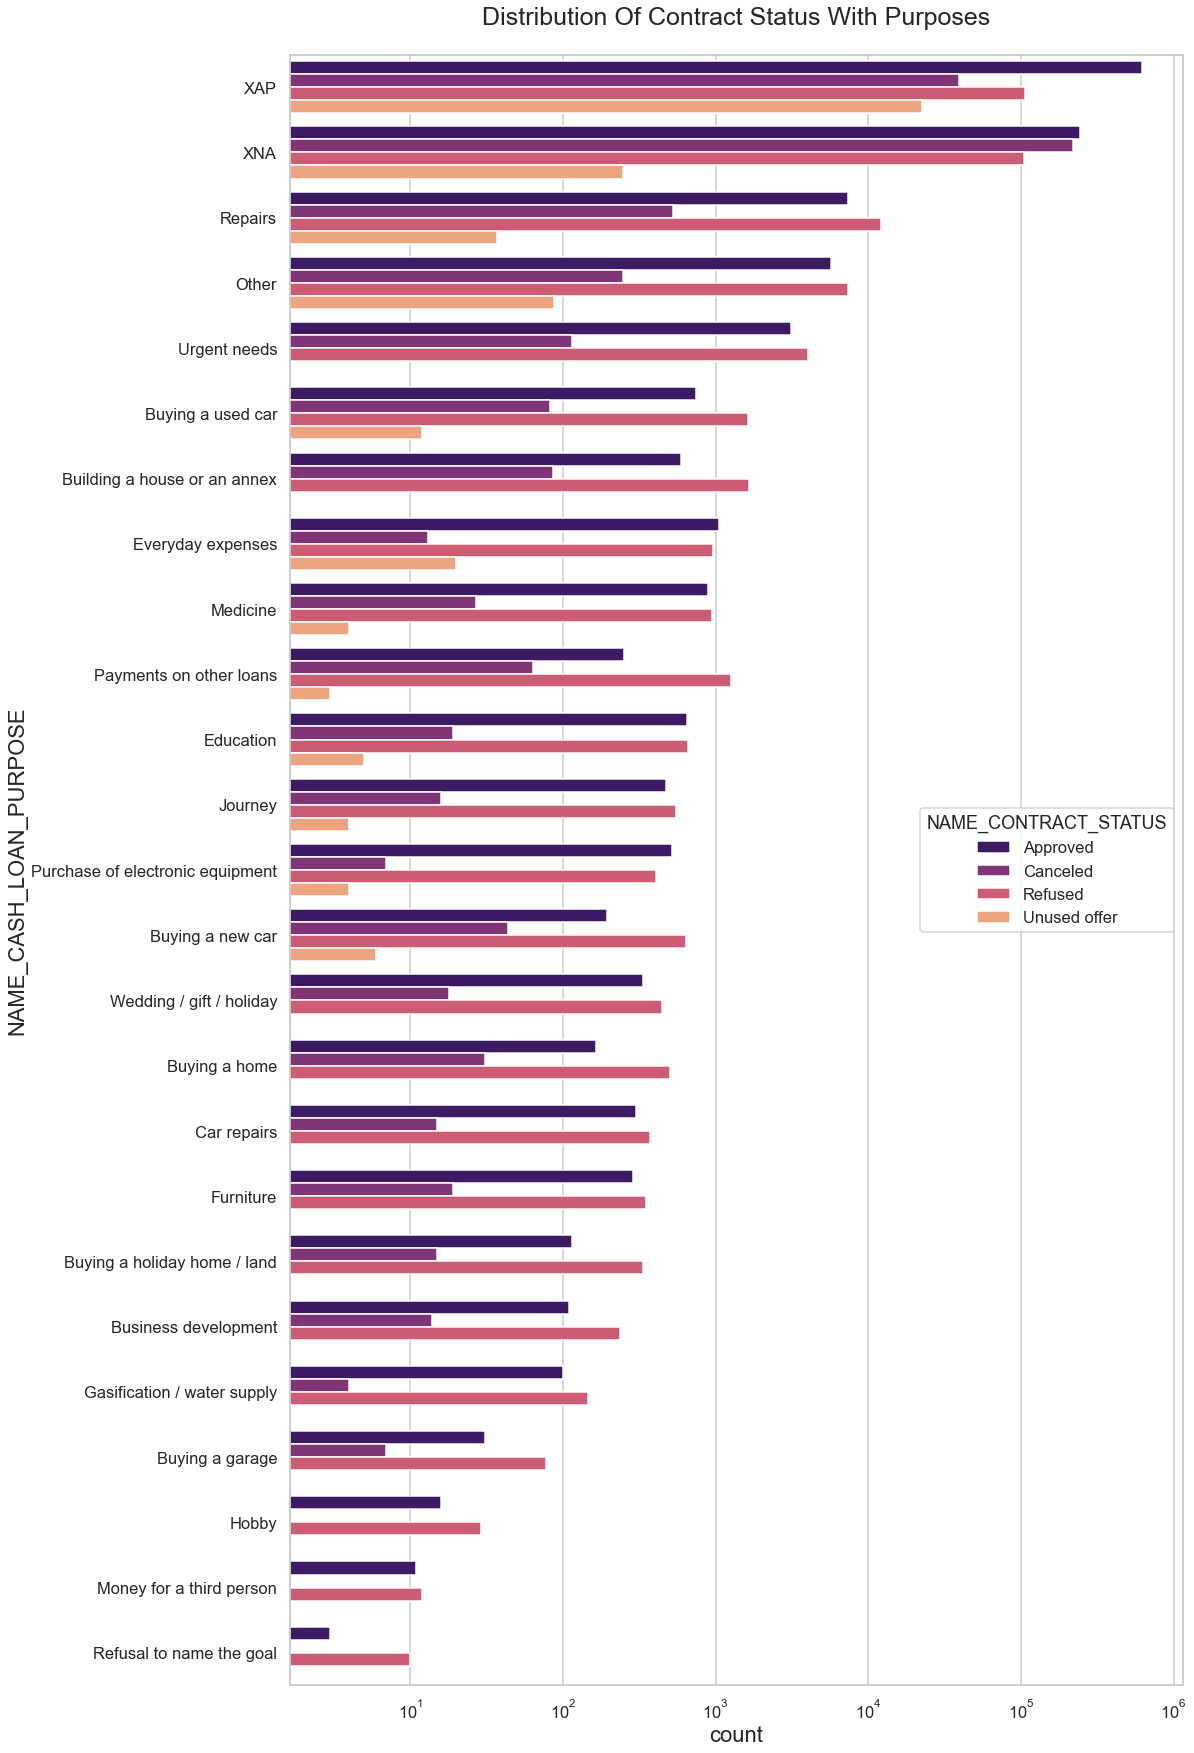

In [98]:
#distribution of Contract status in log scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(16,30))

plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['axes.labelsize'] = 22

plt.xscale('log')
plt.title('Distribution Of Contract Status With Purposes')

ax = sns.countplot(data=new_data1, y='NAME_CASH_LOAN_PURPOSE', order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                  hue= 'NAME_CONTRACT_STATUS', palette='magma')

Conclusion from Above Count Plot:

1. 'Payments on other loans' has most refused rate and 'Buying a new car' also has most refused rate than approved.
2. 'Education' purposes has the same approved and refused rate.

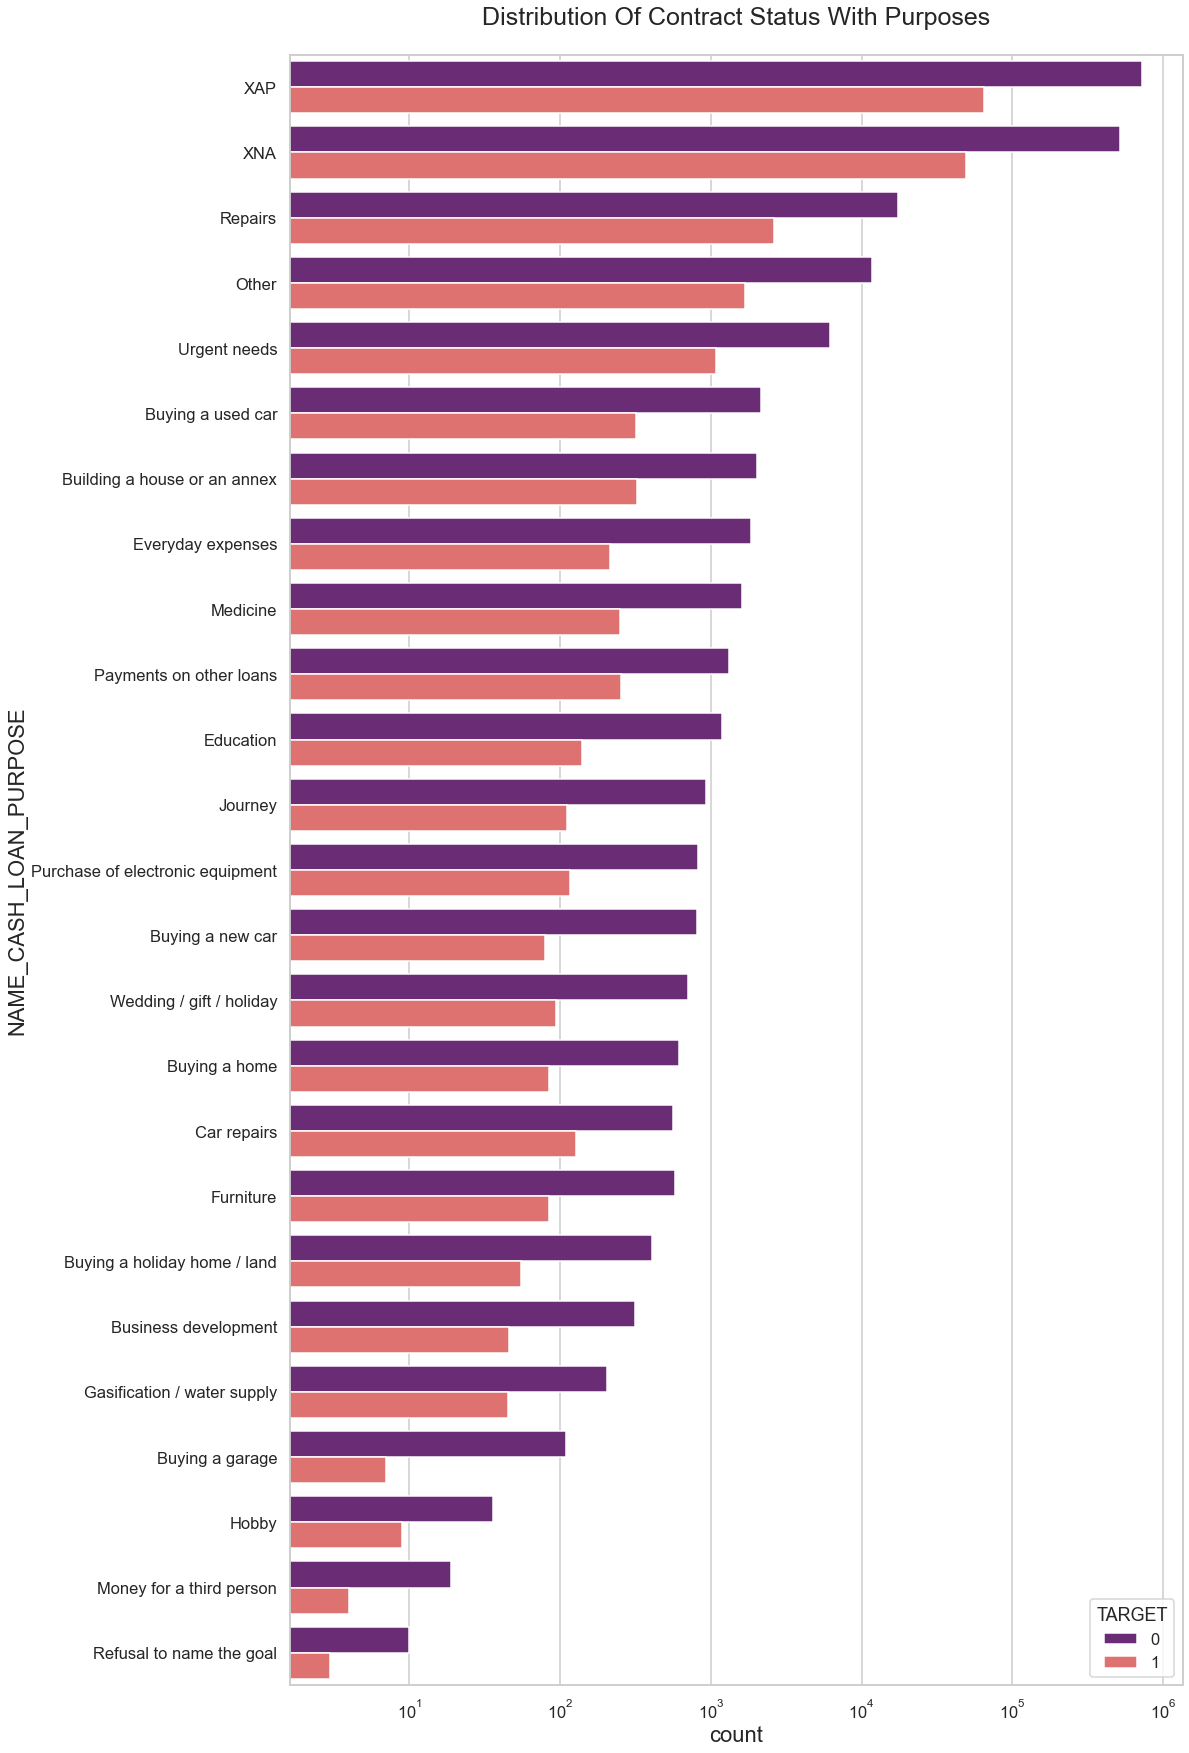

In [99]:
#distribution of Target in log scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(16,30))

plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['axes.labelsize'] = 22

plt.xscale('log')
plt.title('Distribution Of Contract Status With Purposes')

ax = sns.countplot(data=new_data1, y='NAME_CASH_LOAN_PURPOSE', order=new_data1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
                  hue= 'TARGET', palette='magma')

Conclusion from above countplot:

1. Loan purposes with 'Repairs' are facing more difficulties in payment on time.
2. 'Buying a garage', 'Business Development', 'Buying Land', ''Buying a new car', 'Education', are the loan purposes which are having minimal difficulties in payment.

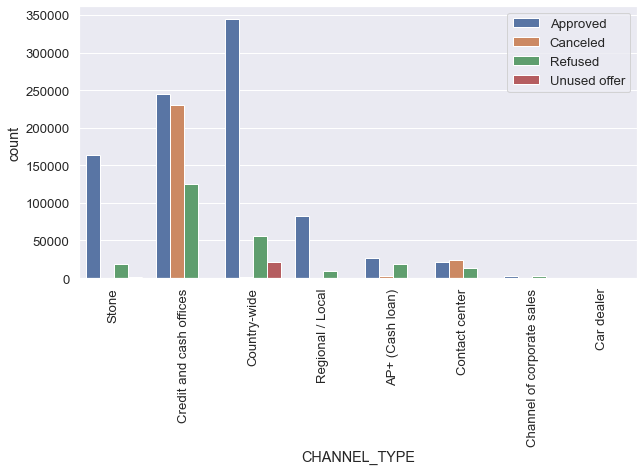

In [100]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,5))


sns.countplot(x='CHANNEL_TYPE',hue='NAME_CONTRACT_STATUS',data=new_data1)

plt.legend(loc="upper right")

plt.xticks(rotation=90)

plt.show()

1. Most clients come through Credit and Cash Office.
2. Most loan refusals are also in Credit and Cash office section.
3. Most loan which come Country-wide is approved.
4. Contract Center we can see canceled is more than approved.

#### Performing bivariate analysis ####

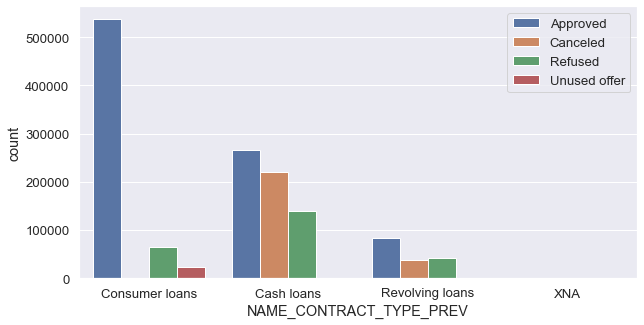

In [101]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,5))


sns.countplot(x='NAME_CONTRACT_TYPE_PREV',hue='NAME_CONTRACT_STATUS',data=new_data1)

plt.legend(loc="upper right")



plt.show()


Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

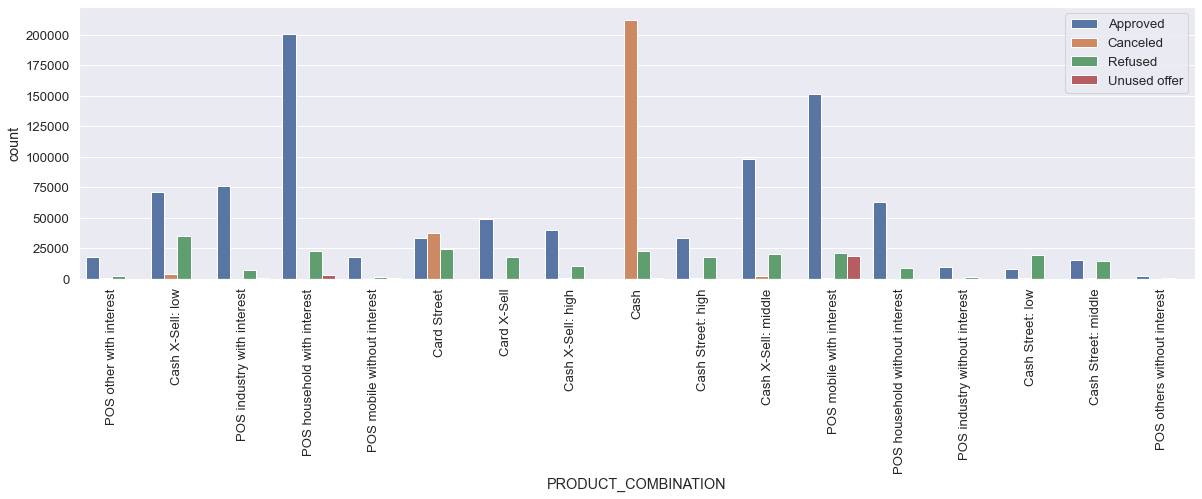

In [102]:
sns.set(font_scale=1.2)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)

sns.countplot(x='PRODUCT_COMBINATION',hue='NAME_CONTRACT_STATUS',data=new_data1)

plt.legend(loc="upper right")



plt.show()


1. Product combination Cash is most cancelled
2. POS household with interest is most approved

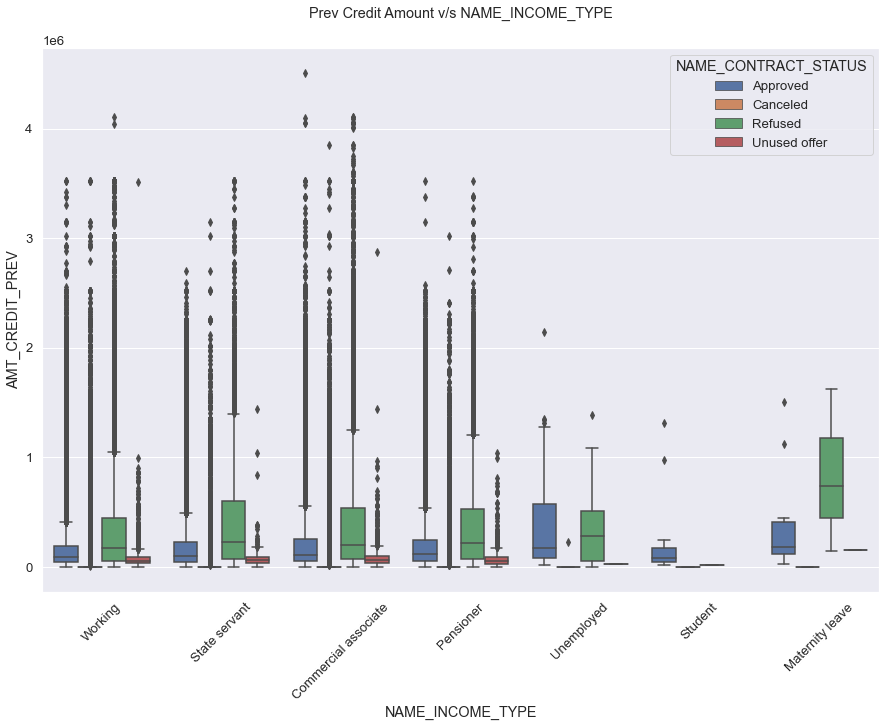

In [103]:
# Box plot for Credit Amount on log scale

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
# plt.yscale('log')

sns.boxplot(data=new_data1, x='NAME_INCOME_TYPE', hue="NAME_CONTRACT_STATUS",
           y='AMT_CREDIT_PREV', orient='v')

plt.title('Prev Credit Amount v/s NAME_INCOME_TYPE')

plt.show()

Conclusion from above Box Plot:

1. 'Maternity Leave' section has good amount of loans refused and there is no outlier for that.

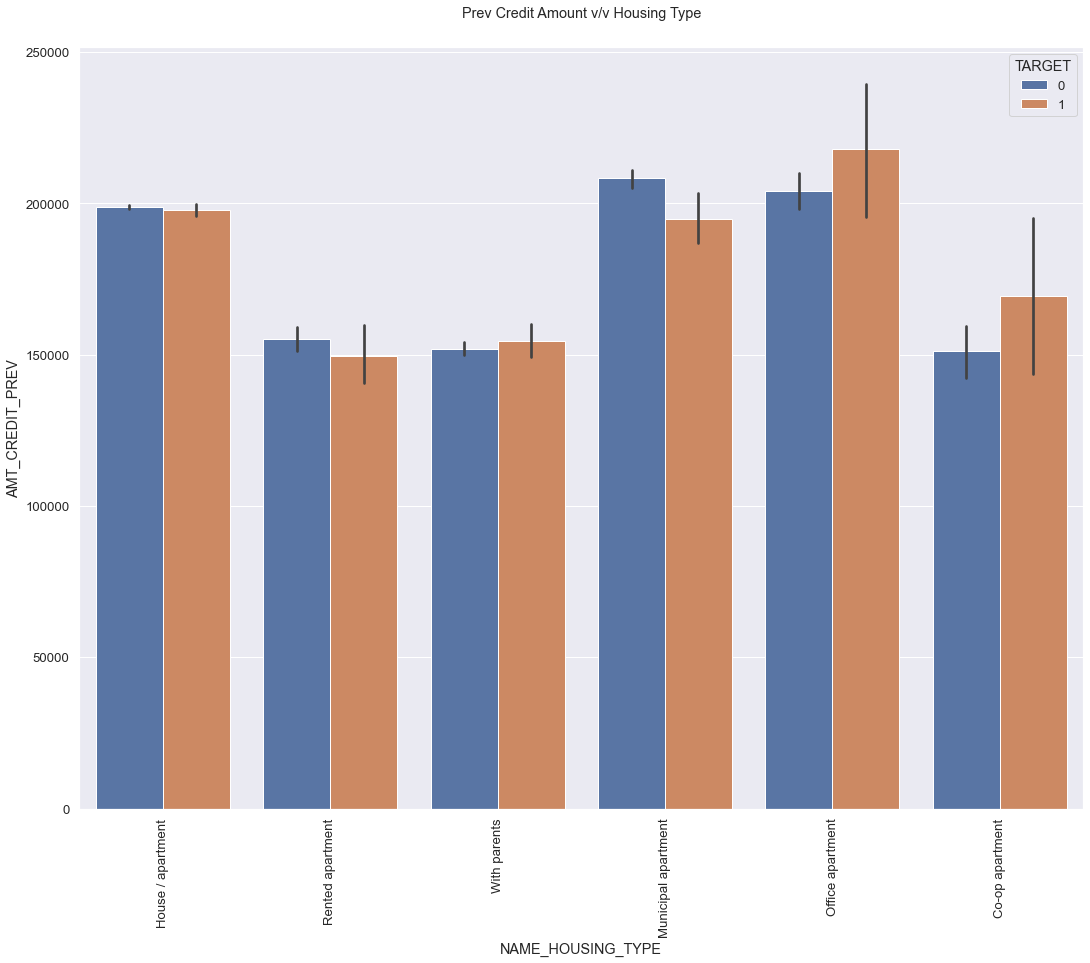

In [104]:
#Box plot for Credit amount prev v/s Housing type on log scale

plt.figure(figsize=(18,14))
plt.xticks(rotation=90)

sns.barplot(data=new_data1, y='AMT_CREDIT_PREV', hue='TARGET', x='NAME_HOUSING_TYPE')

plt.title('Prev Credit Amount v/v Housing Type')
plt.show()

Conclusion from above Barplot:

1. 'Co-op apartment' shows difficulties in repay the loan amount as the bar of Target 1 is high, so bank needs to be careful about this category.
2. 'Municipal aprtment' shows good loan repayment response as bar of Target0 is high , so bank should focus more on this category.

## FINAL CONCLUSION: ##

#### 1. Loan purpose 'Repair' has higher number of unsuccessful payments on time. ####
#### 2. Bank should focus more on "student', 'Pensioner', 'Businessman' with housing type other than 'Co-op apartment for successful payments. ####
#### 3. Bank needs to be extra careful on income type 'Working' as they are having most number of unsuccessful payments. ####
#### 4. Customer from housing type 'With Parents' since they are having minimum number of unsuccessful payments. ####
#### 5. Single people are more defaulters.####